In [1]:
from magnetic_field import *
from utils import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

exact_value = -8.56677223
bn_list = create_bn_list(7)

In [2]:
def get_csv(results):
    for result in results:
        if result == None:
            continue
        print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["bn_type"], result["bn_range"], result["bn_value"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))

def run(method, nqubit, depth_list, bn_type=None, bn_range=None, bn_value=None):
    results = []
    for depth in depth_list:
        result = getResult(nqubit, depth, method, bn_type, bn_range, bn_value)
        if result == None:
            continue
#         print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["bn_type"], result["bn_value"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))
        results.append(result)
    return results

In [3]:
vqe_results = []
nqubit = 7
method = 'indirect_xy'
depth_list = [12,24]
vqe_results.extend(run(method, nqubit, depth_list, 'static', None, '[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]'))

vqe_results

[{'method': 'indirect_xy',
  'depth': 12,
  'bn_type': 'static',
  'bn_range': None,
  'bn_value': '0.0',
  'cost': {'min': -8.195176655083042,
   'max': -4.2123671619411205,
   'mean': -5.993689370956112,
   'std': 1.099620977215148},
  'iter': {'min': 3146.0,
   'max': 38428.0,
   'mean': 8928.01,
   'std': 7172.305505895576}},
 {'method': 'indirect_xy',
  'depth': 24,
  'bn_type': 'static',
  'bn_range': None,
  'bn_value': '0.0',
  'cost': {'min': -8.52737931365344,
   'max': -6.461513291125425,
   'mean': -7.491591685435153,
   'std': 0.6100580449524539},
  'iter': {'min': 10481.0,
   'max': 124300.0,
   'mean': 37641.605504587154,
   'std': 35014.437532872864}}]

In [4]:
## x axis: layer, y axis: expectation value
plot_list = {}
for result in vqe_results:
    if result['bn_type'] == 'static_random':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
            plot_list["%s-iter-min" % result['method']] = [result['iter']['min']]
            plot_list["%s-iter-max" % result['method']] = [result['iter']['max']]
            plot_list["%s-iter-mean" % result['method']] = [result['iter']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])
            plot_list["%s-iter-min" % result['method']].append(result['iter']['min'])
            plot_list["%s-iter-max" % result['method']].append(result['iter']['max'])
            plot_list["%s-iter-mean" % result['method']].append(result['iter']['mean'])
    elif result['method'] == 'indirect_xyz':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
            plot_list["%s-iter-min" % result['method']] = [result['iter']['min']]
            plot_list["%s-iter-max" % result['method']] = [result['iter']['max']]
            plot_list["%s-iter-mean" % result['method']] = [result['iter']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])
            plot_list["%s-iter-min" % result['method']].append(result['iter']['min'])
            plot_list["%s-iter-max" % result['method']].append(result['iter']['max'])
            plot_list["%s-iter-mean" % result['method']].append(result['iter']['mean'])

def create_expectation_graph(title, y_min=-9.0, y_max=-5.0):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(y_min, y_max)

def create_iteration_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("iteration")

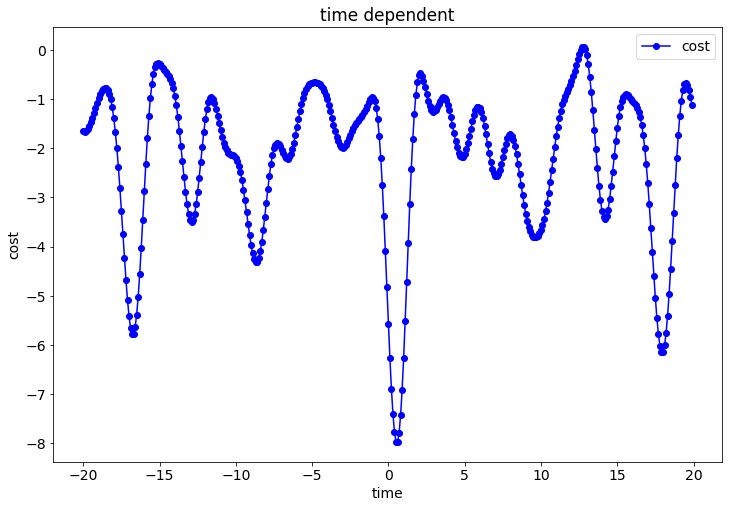

In [6]:
# plot_list = [-0.06552103140259705, -0.18830413568059304, -0.3261777614582753, -0.46720711492142475, -0.6016242223862667, -0.7226450967041854, -0.82636464548676, -0.9109646358171988, -0.9756870844511946, -1.0200705326535446, -1.0438028560603994, -1.0472636399120803, -1.0325150336876243, -1.004270311105698, -0.9703143641847962, -0.9409997160388451, -0.9277522995629338, -0.9408903765191436, -0.9873586033061154, -1.0690956695966416, -1.1826325283667325, -1.320181010305571, -1.4720158968701713, -1.629519983726428, -1.7879956885499635, -1.948346865168408, -2.117018203328471, -2.3040731073801197, -2.5198485367651555, -2.771073838660124, -3.0575355946485234, -3.3702449651205386, -3.6916530517349444, -3.9978909925705732, -4.262463183740073, -4.4604631941833786, -4.572315032107433, -4.586269604659353, -4.499311825400479, -4.316601945500533, -4.049927530847429, -3.715777316206546, -3.333550976258433, -2.9241629236654165, -2.509009083044242, -2.1090677390100394, -1.7438731401140855, -1.4302312001392905, -1.180768134112928, -1.0026077907154738, -0.8965661284841497, -0.857186815061032, -0.873741658058363, -0.9320583877286441, -1.0168110967414097, -1.1137916349947876, -1.2117037563786142, -1.303164434243361, -1.3848010619998907, -1.4565332849301331, -1.5202753417033037, -1.5783706995309457, -1.6320838674715223, -1.6804445352519775, -1.7196814579583644, -1.7433992992608967, -1.7435337345758515, -1.711966641630542, -1.6425120836907965, -1.5328373842255496, -1.385818276245662, -1.2098903033381667, -1.018163197352362, -0.8263736076191186, -0.6500809815479552, -0.5017569950110425, -0.3884921298127352, -0.31090637713294733, -0.2635364293330654, -0.2365726861787289, -0.21846003067241498, -0.19866779668426132, -0.1699360359870165, -0.1295052553650472, -0.07915921148152019, -0.024244868715054907, 0.02792372228137402, 0.06978249649060127, 0.09492984513186391, 0.0989871366382577, 0.07986883346255702, 0.03758865498772036, -0.02619577959387443, -0.10871381228217822, -0.20657863089794867, -0.3162279530364179, -0.4343404446065653, -0.5582600110460642, -0.6864143401597248, -0.818652636527107, -0.9563877906448859, -1.1024378162461663, -1.2605257981413298, -1.4344974771346082, -1.6274139103143874, -1.8407330033514868, -2.0737806866959123, -2.3236278341721834, -2.5853589574368785, -2.852590554766876, -3.118022499022879, -3.3738207833418032, -3.6117372749416505, -3.823036066468717, -3.998450996128131, -4.128472305330078, -4.204201878581455, -4.21882294753011, -4.16945505505395, -4.058906104633273, -3.8966995924685253, -3.6988250192231744, -3.4859448577713854, -3.2802237696074736, -3.1013924076180883, -2.9629657025947553, -2.869585316348228, -2.8162108112281286, -2.7894074329253002, -2.7704161768063638, -2.739222683916349, -2.678613403157016, -2.5772845696453284, -2.4314106179669333, -2.244554813949859, -2.026249984476447, -1.7898503288446481, -1.5502907822573306, -1.3222163031856535, -1.118662247002335, -0.9502083678482116, -0.8243952496190857, -0.745218652649184, -0.712664429686575, -0.7224224856901258, -0.7660231275474274, -0.8316104491987384, -0.9054058670055822, -0.9736825063470296, -1.0248627954830447, -1.0512544407255864, -1.049997526178594, -1.0229919345614156, -0.9758432185989541, -0.9161176858911466, -0.8513569176597905, -0.7873292781794163, -0.7268986011165199, -0.6697118897415606, -0.6127070460143664, -0.5512693801735653, -0.4807517886403556, -0.39802522821171593, -0.302736136570936, -0.19800470284878924, -0.09039416112269572, 0.010889759424581313, 0.09545945015018875, 0.15360628357832223, 0.1781866245457664, 0.16611527580751512, 0.11910555286600297, 0.04345272255574431, -0.051116191437876074, -0.15326780156458308, -0.2521296442283736, -0.3391078817994946, -0.4090441171563884, -0.46049623170323284, -0.49518012490179736, -0.5168384574910857, -0.529938606406634, -0.5386062152368924, -0.5460780470822029, -0.5547545161253974, -0.5667191817868684, -0.5844410956056142, -0.6113345847219517, -0.6519295929406088, -0.7115724564323004, -0.7957697056861228, -0.9094341367345018, -1.0563358296210514, -1.238979423221478, -1.4589465924369551, -1.71752336725404, -2.016260132226698, -2.357063457353563, -2.741530783366532, -3.1694920142711376, -3.637040326175397, -4.13460724987229, -4.645756403255387, -5.147272014819166, -5.610811107078872, -6.00595712822969, -6.3040950010883305, -6.4822650749886055, -6.5261410980788455, -6.4315249274998845, -6.204176019267791, -5.858250317280081, -5.413953903369231, -4.895113133045899, -4.327206361396836, -3.7360707819703274, -3.147134622778309, -2.584781084349893, -2.071424392428865, -1.6260766409694518, -1.2625191588811056, -0.9875182864432768, -0.7996981792241611, -0.6896176742917555, -0.641303277076323, -0.6350652898439708, -0.6510198586259998, -0.6725005652494586, -0.6885530293154669, -0.6949594401757113, -0.6936483733861, -0.6907731875032775, -0.6940582436792349, -0.7101333631726926, -0.7424917339744768, -0.790468720236261, -0.8493398015227631, -0.9113668064077907, -0.967444939412845, -1.0089387250864528, -1.0293261276239618, -1.0253611022891942, -0.9975806822221771, -0.9501010959138199, -0.8897596401045033, -0.824762261661696, -0.763084412328173, -0.710929623837525, -0.6715563736060026, -0.6447243206989114, -0.6268872277511993, -0.6120948625049322, -0.5934007204116173, -0.564452708661791, -0.5209054207815944, -0.4613470348277594, -0.3875647543077887, -0.3041412331022169, -0.21753266285489012, -0.1348856593313692, -0.06288163052511281, -0.0068538744268085705, 0.029675757208448894, 0.045015442754156865, 0.03896351178890145, 0.01227116010034171, -0.0339075154658911, -0.09842139200395145, -0.18029481259037722, -0.27866314012141924, -0.39254658696138856, -0.5205864861723407, -0.6608732360048063, -0.8109557131496832, -0.968051807211455, -1.1294031820200696, -1.2926611177194156, -1.4561737983283074, -1.6190736287996557, -1.7811248594286013, -1.9423645127072673, -2.1026291853756236, -2.261090524213664, -2.4159200035157924, -2.564177542435943, -2.7019811845538104, -2.8249748524257368, -2.929067533992176, -3.0113634948434647, -3.071135564418354, -3.1106217168346952, -3.1353760217350324, -3.15391641112497, -3.1765152153684624, -3.213178525849549, -3.271120148201769, -3.352278682640792, -3.4515575927565187, -3.5564111363110826, -3.6481307444798317, -3.704758368564305, -3.705084730462309, -3.632832813384418, -3.480010753431813, -3.248601723010506, -2.9501992719213765, -2.6037607231874302, -2.232156451437712, -1.85847362762707, -1.5030010376753804, -1.1814990655365012, -0.9048705048227488, -0.679873919934129, -0.5102303811550745, -0.39746085166082396, -0.34104205830553364, -0.33787074055006594, -0.38141352162000086, -0.4611371812428414, -0.5627763339533509, -0.6697167480596615, -0.7653585401046996, -0.8359293717647762, -0.8729895874094455, -0.8748935013287719, -0.8467392067867152, -0.798765035872344, -0.7435960953324097, -0.6930697110860521, -0.6554783178270003, -0.6339370986026721, -0.6262590943098435, -0.6263027833736236, -0.6263656975138336, -0.6199361609166996, -0.60404528001514, -0.5805903155710268, -0.5562849940146303, -0.541252777765955, -0.5466223744607807, -0.5817269236620004, -0.6515942228843787, -0.7553304941142831, -0.8857724868359048, -1.0304741934624688, -1.173784466004109, -1.2995360842775292, -1.3937579425279123, -1.4468570146210116, -1.4548751106772735, -1.4196578119325407, -1.348017227290205, -1.2501691222478317, -1.1378399353280828, -1.0224564817192174, -0.9137602662812025, -0.8190551699158459, -0.7431356142443635, -0.6887867250638797, -0.6576290778056804, -0.6510214794294529, -0.6707482095890009, -0.7192997625917206, -0.7996885203351574, -0.9148869530345195, -1.067091398122301, -1.2570597399069878, -1.4837274096272037, -1.7441853768374667, -2.0339498731948358, -2.3473281235836554, -2.677643604326966, -3.0171545086002154, -3.3566612982638215, -3.684992177745471, -3.9886968553645943, -4.252298990288791, -4.459329513235148, -4.594118698794475, -4.644047289914104, -4.6017494346894035, -4.466705756534093, -4.24579195749621, -3.952617507493613, -3.6058072045248424, -3.2266356249939623, -2.8365371372500796, -2.4549574526490625, -2.0978280326703937, -1.776719095106687, -1.4985539433403974, -1.2657062680293198, -1.0763542198879792, -0.9250764859287702, -0.8037652954041907, -0.7029315301315007, -0.6133677051287973, -0.5279550108591127, -0.4432343746908127, -0.3602991126164442]
# plot_list2 = [-0.09971085023585885, -0.03933749263492772, 0.04527773239203983, 0.14554455024658636, 0.25173264142789503, 0.3544612834690015, 0.446021202241937, 0.5213071838711577, 0.5781889576850414, 0.6172411361600139, 0.640885021257705, 0.6521377216722138, 0.6532733861737537, 0.6447351575609523, 0.6245736333918437, 0.5885405360668725, 0.5307791532027334, 0.4448868400430374, 0.325034704689093, 0.16684458258587692, -0.03216402580454478, -0.27257532965189585, -0.5533794457169591, -0.8723231885160438, -1.226049965237546, -1.6098630219100594, -2.0171106184004266, -2.4383719811561537, -2.8607573059843774, -3.267674356851928, -3.6393378634121456, -3.9541222709221233, -4.190633016113473, -4.330164519169605, -4.359089322092226, -4.270721821977272, -4.066321868585934, -3.7551077916204854, -3.353368236231325, -2.8829277784030993, -2.3692855047421983, -1.8397011854367578, -1.3213848679672446, -0.8398149326593303, -0.417131463506239, -0.07056607788479546, 0.18902675892158738, 0.35832562865258577, 0.4420602422148633, 0.4525588665658189, 0.4081302600168398, 0.33035370717441537, 0.24067640853841765, 0.15698971598496764, 0.090964344531375, 0.046803141498160394, 0.021727184423529486, 0.008038052603960039, -0.003855101152916457, -0.022334031222233708, -0.052283786460776104, -0.09421389821966218, -0.1448941066877589, -0.19909741064326547, -0.2516920930501937, -0.29926285255552537, -0.34068745125961625, -0.37654847600199337, -0.40773855745108084, -0.43393224752721055, -0.45262778507794427, -0.4592034942322569, -0.4480001249582456, -0.4140140640663964, -0.3545407983715505, -0.2701372673460273, -0.1645537371688477, -0.04369603180288337, 0.08595376459088981, 0.21885067305187006, 0.35129620548946267, 0.4814807771769643, 0.6087541385557744, 0.7325126234961788, 0.8512108652075119, 0.9619160256327483, 1.0605746596565482, 1.1428628118380115, 1.2052561210715624, 1.2458717479027064, 1.2647202296720599, 1.2632231884506866, 1.2431207506503354, 1.2051188866483062, 1.147739705645697, 1.0668044554045601, 0.9558118598347924, 0.807223394839226, 0.6144038082015264, 0.37376329169740613, 0.0865637430894298, -0.24008975345391498, -0.5933637170362271, -0.9559423547598048, -1.3081565397587447, -1.6305411834633925, -1.9062823956543529, -2.123072434978755, -2.274065446282509, -2.3578649797833426, -2.3777052323803978, -2.3401493009126835, -2.253682789969657, -2.127527627229735, -1.9708681110231057, -1.7925174043680154, -1.600908970918241, -1.404212720439138, -1.21036741609206, -1.0268833861252635, -0.8603780813051259, -0.7159264144014685, -0.5964023640566166, -0.502030408787442, -0.4303416540172953, -0.3766436952680958, -0.33498502336921077, -0.29945556339374746, -0.26555112634083244, -0.231274303072365, -0.1976694551593748, -0.16859877757907896, -0.1497421341282097, -0.14700699616271065, -0.1647136720671484, -0.20402048464271133, -0.2620331831303784, -0.3318921621823259, -0.4038790589873896, -0.46729746753473167, -0.5126482480737394, -0.5335187603194322, -0.5276805854652072, -0.49712703225429966, -0.44710601013776147, -0.38450547591973094, -0.3161211307809288, -0.24731880262171502, -0.181408707252763, -0.11975712860821924, -0.06239221484302637, -0.008721721451847603, 0.04197914392291155, 0.09046221247990427, 0.13769288971501745, 0.18506040740408997, 0.2343164370453238, 0.28708542089206596, 0.34403026078319787, 0.40398473062669116, 0.46346709024770305, 0.5169092351480734, 0.5576943560168235, 0.5797873331823467, 0.5794911160142653, 0.5567722660879376, 0.5157082458961787, 0.46387805163997414, 0.4108471763615074, 0.3661707308144618, 0.3374655632380398, 0.3290520064810897, 0.3414698697378369, 0.371906911216981, 0.41532902674768857, 0.4659394299806483, 0.5185524072038553, 0.5695399425835357, 0.6171614615203964, 0.6612689822929985, 0.7025434048485878, 0.7415244394884817, 0.7777251132081735, 0.8090692458451689, 0.831773484597689, 0.8406479443766232, 0.829654863113065, 0.79248573745972, 0.7229229629087932, 0.6148458498058527, 0.4618975782833433, 0.25699997362940397, -0.007971675952675616, -0.342010280602548, -0.7540371325108021, -1.2511322756647971, -1.8361145325507537, -2.50489005345305, -3.2441507842415995, -4.030038896623035, -4.828280564044499, -5.596049996361791, -6.285502310394684, -6.848581360137002, -7.2424384782255, -7.434648126450509, -7.407407411213377, -7.16005619948873, -6.709520804105452, -6.088613384725497, -5.342449411423749, -4.523519229780912, -3.686123878451744, -2.8809372044455994, -2.1503856864217177, -1.525364737647287, -1.023572695835093, -0.6494879568726458, -0.39578793363884435, -0.24584789176155514, -0.17688145154174187, -0.16328787239820125, -0.1798299206333805, -0.20434749291121018, -0.2197897387713767, -0.21541350070050497, -0.1870598141596443, -0.13650480191407238, -0.07000117352770718, 0.0037276635329441116, 0.07564612847248649, 0.13826028387172, 0.18676643253737618, 0.21928240074759076, 0.23622718690368494, 0.2391915445074072, 0.22981126566656815, 0.2091382425623389, 0.17779128530416982, 0.13682969523825972, 0.08895762527059037, 0.03947514425258147, -0.003568244902290324, -0.030291899132951744, -0.03084514286961823, 0.0022987797811887534, 0.07233278385240277, 0.17705404544198436, 0.30911715294701037, 0.4575389974525288, 0.6099890392088215, 0.7551692595094015, 0.8846084136957428, 0.99344449312328, 1.0801434089467157, 1.1454575479182594, 1.1911387978208288, 1.2189231175997306, 1.2301148556339303, 1.225804166693174, 1.2074677084995606, 1.1775372361416043, 1.1395308061613512, 1.0975201305155924, 1.0549887221467762, 1.0134169776286748, 0.9711090786562604, 0.9227816658935636, 0.8602504737023104, 0.7742257822810593, 0.6568580504812567, 0.5043804255623826, 0.3190784072335154, 0.10993190865170176, -0.10839669996307393, -0.3181013325448412, -0.5017252618592389, -0.6457375274562565, -0.743267675688545, -0.795288485452921, -0.8099599799836612, -0.8003547744962748, -0.7812222419820881, -0.7656868011524154, -0.762746970853128, -0.7761634721230848, -0.8048897834364348, -0.8447450421235146, -0.8906944498590377, -0.9389800032783779, -0.988456908979732, -1.040786810165734, -1.0995135116680435, -1.1683803333877973, -1.2494449700669783, -1.341564948853442, -1.4396822053675582, -1.5350933985470414, -1.6166359998359527, -1.6725189517642647, -1.6924174399774716, -1.6694336823075215, -1.6015746036650995, -1.4924832456639556, -1.351265898532129, -1.1913792171924356, -1.0286854502257852, -0.8789441950825146, -0.7551591483789045, -0.665291683402701, -0.6108405796232355, -0.5866423800329595, -0.5819865769932331, -0.5828280216945994, -0.5746082087406887, -0.5450545872287482, -0.4863593037955365, -0.3963316121097523, -0.2784018827436704, -0.14063310163775633, 0.005916393079754945, 0.14907761724433766, 0.27736007729609147, 0.3814219158226503, 0.4551145489989773, 0.49606727456745603, 0.5058002134011905, 0.4893561626529065, 0.4544621883745903, 0.41029278218666576, 0.3659991700330432, 0.32925624618020977, 0.3051129836841851, 0.29538395665380635, 0.2986930406179194, 0.31111481902987465, 0.3272127556226225, 0.34119703552078384, 0.34794156623971084, 0.3436941550991089, 0.3264425404389445, 0.29600903662916517, 0.253998568241095, 0.20370708398068835, 0.15002753426271537, 0.09930600856578667, 0.05904177949374616, 0.037320414659773926, 0.04192617231699303, 0.07918357876574304, 0.15269643051480034, 0.262246015428262, 0.403143039260925, 0.5662772387597169, 0.7389744208040729, 0.9065777482534474, 1.0544664989253003, 1.1700717951601862, 1.2444009305287294, 1.272671810471076, 1.2538791674578407, 1.1894133843887396, 1.0811465920322938, 0.9295957364599086, 0.7327965668333197, 0.48635214281238204, 0.18479143106864562, -0.17602171109078946, -0.5960335048366794, -1.0684891937762064, -1.5785196292665817, -2.103324977457583, -2.6140548564357546, -3.079055373135703, -3.4678211419462746, -3.754846799357363, -3.9226480171049336, -3.9634768763761765, -3.879597768374695, -3.682306557071948, -3.3900783041092613, -3.026279969799507, -2.616806809722812, -2.1878612929720793, -1.7639688348632683, -1.3662687444446744, -1.0111386863381346, -0.7092686710026254, -0.4653357770617317, -0.2783939899299264, -0.1429734871325578, -0.050715560001929894, 0.007780595312142868, 0.041288577125424816, 0.0567993473838983, 0.05905918278135014, 0.05077713490983902, 0.03330227095577121, 0.007480592763247307, -0.025585019466742465]
# plot_list = [-0.5747397759012484, -0.6043149174636446, -0.625008391143589, -0.634420908483172, -0.6317266056638202, -0.6176358506293531, -0.5941811941035813, -0.5643408224525842, -0.531547909588457, -0.4991685326765196, -0.470053427928976, -0.4462686420091893, -0.4290811708568174, -0.4192206271999276, -0.41736864805986196, -0.4247624140044166, -0.44375671298162234, -0.4781847201031963, -0.5333951566300716, -0.6159146113838707, -0.7327701640289486, -0.8905857690186139, -1.0946151113886071, -1.3478815408688034, -1.6505623521081096, -1.9996922493287708, -2.3891891813261164, -2.810145776392897, -3.2512966028209127, -3.6995705731600483, -4.140663277389795, -4.559602276755261, -4.941313379704221, -5.271214919218796, -5.5358645850511286, -5.723662150645379, -5.825580282293952, -5.835865503249692, -5.7526314527006495, -5.578261622424259, -5.319548870960215, -4.987521081359824, -4.596932168814087, -4.165431665138227, -3.712461654822193, -3.2579643912705527, -2.8210139351357357, -2.418505569913699, -2.0640418071145445, -1.7671390213747458, -1.5328432428145389, -1.3617914463409804, -1.2506945679919168, -1.1931617914454757, -1.1807431643311777, -1.204046550161703, -1.2537872817479472, -1.321651546913163, -1.4008910120383886, -1.4866089613177227, -1.5757407610702348, -1.6667691105414328, -1.7592443845701862, -1.8532003994864554, -1.948564398421296, -2.0446555003445583, -2.139847863993447, -2.23144501307374, -2.315774463958063, -2.3884736737457977, -2.4449070705178606, -2.480636181154613, -2.49186422209912, -2.4757922661924514, -2.4308512927689794, -2.356805204392715, -2.2547457299540574, -2.1270143418534104, -1.9770860209206096, -1.809436718225463, -1.6293966500121564, -1.4429733854681002, -1.2566199366519197, -1.0769285194798095, -0.9102501022925139, -0.7622677234614381, -0.6375784288400184, -0.5393543328863155, -0.46915035252228593, -0.4269030037475039, -0.4111265990595414, -0.419271109333545, -0.4481727558216555, -0.4945144515840384, -0.5552224651626976, -0.6277539560842353, -0.7102663477846407, -0.8016900767431244, -0.9017397987371107, -1.0108914143321575, -1.1303281127013285, -1.2618303544020648, -1.4075674895000811, -1.5697543876296274, -1.750168263135033, -1.949571111080982, -2.167135060923753, -2.4000012710132106, -2.6431014998675106, -2.889329579585152, -3.1300758270843008, -3.3560511340503307, -3.5582549898918634, -3.7289059025051836, -3.8621653463236196, -3.9545436904342917, -4.004960218669745, -4.014512732687697, -3.986069653938511, -3.9238131368205558, -3.832834620378023, -3.718828350609129, -3.587866701561078, -3.4461970751352067, -3.2999892664861683, -3.1549868856011365, -3.0160660303700606, -2.886759706722773, -2.7688470590378738, -2.6621177433071423, -2.564399426211048, -2.4718868127816016, -2.3797478013000113, -2.2829229207237636, -2.1769922971043787, -2.058968442995294, -1.9278847911273886, -1.7850848618222879, -1.6341671920152816, -1.4805969536336308, -1.3310469887952099, -1.192570638156605, -1.0717304099544054, -0.9738074546933186, -0.9021977458693602, -0.8580661604717204, -0.8402864894286978, -0.8456523065802968, -0.8693084421977556, -0.9053308470830699, -0.947375495383918, -0.9893225475870855, -1.025855582078889, -1.0529318444502136, -1.068113798791707, -1.0707428009175506, -1.0619431135335775, -1.044451368419178, -1.022276141209187, -1.0002067234156478, -0.9832093857016125, -0.9757706085897546, -0.9812647983323449, -1.0014328475327958, -1.0360524592813602, -1.0828592655666986, -1.1377414996241102, -1.1951867386647974, -1.2489164617060202, -1.2926128357699591, -1.3206297707593455, -1.3285895031632458, -1.3137935755782477, -1.2754150151390744, -1.2144765539661098, -1.1336489295068652, -1.03691888542613, -0.9291791028790695, -0.8157870057491737, -0.7021329522356576, -0.5932557632826589, -0.4935455561372606, -0.4065763152395779, -0.3351064189721039, -0.2812679226068287, -0.24693269170857662, -0.23420023564918235, -0.2459095678641195, -0.286050130978727, -0.3599473313589896, -0.4741318885014114, -0.6358640136788476, -0.8523584420693142, -1.129823899215867, -1.472471097042943, -1.8816452227013498, -2.355202908028355, -2.887193113762435, -3.4678373658287773, -4.083758635422306, -4.718393339098596, -5.352537979709567, -5.965018264446992, -6.533503432314655, -7.035501573143252, -7.449551224872887, -7.756572717199731, -7.941275518067847, -7.993459248575823, -7.909019267043212, -7.690486461791166, -7.34699408290772, -6.89365654177085, -6.350441522839741, -5.740692293800915, -5.0894941892713526, -4.422072958123915, -3.762371074943385, -3.1318882397827426, -2.548813555770747, -2.0274346494606115, -1.5777903837445908, -1.2055367753400283, -0.9120113395821919, -0.6944976018772598, -0.5466986829093363, -0.4594210677887405, -0.4214472073599409, -0.42054407378567016, -0.4445231015637723, -0.4822446252859375, -0.5244545458498373, -0.5643561440594208, -0.5978544292030445, -0.6234581750751973, -0.6418765173207834, -0.6553921559640966, -0.6671226615956877, -0.680289504918835, -0.6976004509394806, -0.7208190279713343, -0.7505527839950695, -0.7862495558420118, -0.8263569293392887, -0.8685807233610038, -0.9101760434640733, -0.9482174214584083, -0.9798175367762512, -1.0022897497576007, -1.0132707596827792, -1.010830446587113, -0.9935938826894082, -0.9608870260564519, -0.9128977079103946, -0.8508242922397934, -0.7769728424919694, -0.6947643766602529, -0.6086273229809404, -0.523772637803682, -0.44587304319141774, -0.38068564302269203, -0.3336632180470487, -0.30959271908972424, -0.31228386268121777, -0.34431384693763206, -0.4068241161561368, -0.49936687137710706, -0.6198121703420089, -0.7643445622100209, -0.927591019784432, -1.1029194381185696, -1.2829238375649534, -1.460071165887592, -1.6274359746985922, -1.7794092861495603, -1.912252574801524, -2.0243866486759803, -2.116357312725167, -2.190492412134803, -2.2503372767926324, -2.3000052584766095, -2.3435907887243714, -2.384760364699579, -2.426572514842709, -2.4715025248037135, -2.5215865381055202, -2.578572320078842, -2.6439778972748647, -2.7190070705189906, -2.8043333439692217, -2.8998177316866416, -3.004252405742546, -3.1152138577474178, -3.229072343141353, -3.341155386207046, -3.446021784388214, -3.537783818153417, -3.6104237769478584, -3.6580794352988164, -3.6753068016504726, -3.657351047790403, -3.6004572193257873, -3.502230041799426, -3.3620156195708693, -3.1812418960014233, -2.9636343718515894, -2.715228207622474, -2.4441280754272143, -2.1600148330085105, -1.8734495089561425, -1.595065659343435, -1.3347602176928395, -1.1009867617391338, -0.9002273980593245, -0.7366796654026518, -0.6121548149685148, -0.5261540560082731, -0.47607607222315906, -0.45751276815915826, -0.4646058297258521, -0.49045584350331917, -0.527589407939764, -0.5684912703539609, -0.6061959540622318, -0.6349097281044644, -0.6506064836885574, -0.6515194240627387, -0.6384428239387157, -0.6147693744242, -0.5862187852414009, -0.5602574470123628, -0.545258575838491, -0.5494974664003045, -0.5801082272281406, -0.6421403172776661, -0.7378427688429651, -0.8662726354130716, -1.0232770784092649, -1.201843539038232, -1.3927591203735583, -1.585478107591905, -1.769073171783002, -1.933145419363746, -2.068590504695678, -2.168156935524646, -2.226778872672482, -2.241707805555275, -2.2124953869474986, -2.140887531289081, -2.030677752477507, -1.8875418630652634, -1.718846981859102, -1.5334065126532042, -1.3411476119442023, -1.152671071566853, -0.9787111665239615, -0.8295352295872, -0.714347989187798, -0.6407747878855581, -0.6144870842427398, -0.6390064994098309, -0.7156891115782817, -0.843860875182584, -1.0210569139264112, -1.2433154071137809, -1.5054876656601626, -1.8015417990561313, -2.12484922985469, -2.4684457105602693, -2.825252004963831, -3.1882304629276517, -3.5504515441295554, -3.9050561127010543, -4.245125958601489, -4.56350954632917, -4.8526795817241934, -5.104709843592455, -5.311442162418468, -5.464871274797857, -5.557716678080245, -5.584094582836715, -5.540168108071457, -5.424652042834573, -5.239080797544247, -4.987804026511212, -4.677735553885603, -4.317928352847893, -3.919067873650213, -3.492964713616445, -3.0520930172382, -2.609178121068286, -2.1768025733568304, -1.766986280280149, -1.3907083853233915, -1.057370598589167, -0.7742421290300008, -0.5459606225381713, -0.3741793443650596, -0.2574420951933444, -0.19133551673919208]

plot_list = [-1.6456432333321258, -1.664505488359512, -1.6539378865957102, -1.615585569794814, -1.5530483952383056, -1.4713309332907476, -1.3762438509778265, -1.2738353046822626, -1.169922449057764, -1.0697759289895448, -0.9779861467337491, -0.8985120092400419, -0.8348842578796605, -0.7905101432514905, -0.7690077064705294, -0.7744891289059829, -0.8117152240180556, -0.8860574261489607, -1.003228294615855, -1.1687738881030538, -1.3873575605425565, -1.6619003210816403, -1.9926732901931798, -2.3764587554328283, -2.8059045095799697, -3.2691893898155477, -3.7500955933694957, -4.228546498478032, -4.68162023911694, -5.0849937627906625, -5.414715594426035, -5.649155032472969, -5.770938189839999, -5.768663540385909, -5.638195960118751, -5.383370348678756, -5.015991969335684, -4.555095172769986, -4.025506467814122, -3.4558411175342902, -2.8761331301816817, -2.3153464506381116, -1.7990330231287985, -1.3473880678592105, -0.9739060561163995, -0.6847687087227272, -0.47900868149040243, -0.349401237853996, -0.2839530964191072, -0.2677931123204155, -0.28523082135127575, -0.3217396317505904, -0.36564109650969223, -0.40931121103576784, -0.4497923785721886, -0.48876734966595026, -0.5319254395141129, -0.587818597269417, -0.6663587071206032, -0.77714292479327, -0.9278080633356272, -1.1226073741822313, -1.3613749640605635, -1.638997905432854, -1.9454588091332305, -2.2664483756556377, -2.5844849717722367, -2.8804232680363797, -3.135192311173535, -3.3315795254595484, -3.455873478802709, -3.4991949546926175, -3.458380764508571, -3.336333597233705, -3.1418083087572466, -2.8886638819630877, -2.5946643249973502, -2.2799552674621384, -1.9653716147956237, -1.6707428252271876, -1.4133557247423698, -1.2067118248283215, -1.059680149543476, -0.9761021982374889, -0.9548581626421497, -0.9903582384906771, -1.0733846021868727, -1.1921820122368945, -1.3336801658170248, -1.484729303754574, -1.6332408698689893, -1.7691446942128364, -1.8850997190071266, -1.9769229900959713, -2.0437281036459893, -2.0877869712454427, -2.1141462214488116, -2.130041541249045, -2.1441604932053626, -2.165808109050203, -2.2040312299198273, -2.2667581451245393, -2.3600099203867275, -2.4872385048757346, -2.648843280183914, -2.8419109385211065, -3.0602124229642023, -3.294474707807089, -3.532924902657336, -3.7620809427057704, -3.967739193714504, -4.13608734096375, -4.254853684896262, -4.314393804222423, -4.308614145904817, -4.23564024766108, -4.098154834654194, -3.90335690380908, -3.6625252682964073, -3.390206352649448, -3.1030832107439967, -2.8186172579492843, -2.5535823095351735, -2.322628531634285, -2.137018705704322, -2.003668729713887, -1.9245981055303814, -1.8968559141598915, -1.9129372646374017, -1.9616501600554412, -2.0293401652658085, -2.101337447690131, -2.1634640155278584, -2.203432534421909, -2.2119832823211194, -2.183640661102303, -2.1170202730095067, -2.014674740922402, -1.8825230594519389, -1.728956525387801, -1.5637480253141243, -1.3969069518560597, -1.2376184468158669, -1.0933849388851442, -0.9694541374445822, -0.8685761741293493, -0.791089270229449, -0.7352935505441154, -0.6980407880896815, -0.6754469243579262, -0.663625639261801, -0.6593450829545435, -0.660524914949177, -0.6665147911716709, -0.6781253989101587, -0.6974155736613655, -0.727270260224884, -0.7708305661747499, -0.8308558628784181, -0.909106627761767, -1.0058344306575786, -1.119452379197021, -1.2464369840964094, -1.3814834468084591, -1.5179042829673672, -1.6482298378750875, -1.7649424154060278, -1.8612567133368352, -1.9318504574136055, -1.9734518613087777, -1.9852048686861439, -1.9687578396563157, -1.928054007658281, -1.86883920373627, -1.797939812891244, -1.7223970980595635, -1.6485684021679634, -1.5813174658982072, -1.5234125472497342, -1.475231299218491, -1.4348366350699704, -1.398441441433514, -1.3612272874403113, -1.3184299047818882, -1.266559394977131, -1.2045925896438994, -1.1349639687806303, -1.0641928751749283, -1.003018370225038, -0.965965830376716, -0.9703354398366337, -1.0346742689509578, -1.176861856085321, -1.411995544958035, -1.750298978959203, -2.195290035486889, -2.7424308220513534, -3.3784429298830148, -4.081409667257541, -4.821709701513365, -5.563741487801671, -6.268314103276811, -6.895506734330267, -7.407744268560954, -7.772806603316358, -7.966488220532616, -7.974653033772098, -7.794484939963791, -7.434811240347216, -6.915465922188499, -6.265752895434803, -5.522155424127957, -4.725507829179777, -3.9178917888187215, -3.139537920175525, -2.426002913603055, -1.8058558079975955, -1.2990493747562357, -0.9160812905029543, -0.6579729499774429, -0.5170193199909756, -0.478198006907289, -0.5210749008401601, -0.6220106724426269, -0.7564584665787193, -0.9011481271816315, -1.0359745674508654, -1.1454446997871843, -1.2195849723727408, -1.2542656152369334, -1.2509532778956969, -1.215955766958614, -1.159266238628787, -1.0931454011201347, -1.0305962483610287, -0.9838854884757141, -0.9632499601745469, -0.9758975793144392, -1.0253747969878666, -1.111331066408673, -1.2296703681225138, -1.3730447468523048, -1.5316181878658266, -1.6940126379366842, -1.8483416973182571, -1.9832403733234256, -2.088809357423314, -2.157407255832875, -2.184241793759763, -2.167729282317272, -2.1096091290361416, -2.014815954592809, -1.8911254873212133, -1.7486017553093385, -1.5988823565543264, -1.4543460754249735, -1.3272131573573054, -1.228633359422005, -1.1678204098963592, -1.1512933187496188, -1.1822842692104334, -1.2603684597619302, -1.381362033817615, -1.5375191605521983, -1.7180381062198156, -1.9098594901715067, -2.098709848584093, -2.2703133699207023, -2.411668375607942, -2.5122672595432385, -2.5651331337988874, -2.5675559760401736, -2.5214362192519397, -2.433182631785165, -2.313159805302304, -2.1747325413748366, -2.0330028776627875, -1.9033735429509795, -1.8000936785446364, -1.734945329458856, -1.716211891276434, -1.7480346742485169, -1.830215794929973, -1.9584712477965929, -2.125084505599835, -2.319865289060726, -2.5312859075640968, -2.7476525031160817, -2.9581719689905057, -3.1537961857176215, -3.3277602755948448, -3.4757758953164255, -3.5958882028809045, -3.688049789158252, -3.7535007503656463, -3.794066549051971, -3.811491473908015, -3.806914632287616, -3.7805690925459814, -3.73174683288995, -3.659028095056393, -3.560730139793216, -3.435493874268111, -3.2829030309214082, -3.1040233088113283, -2.9017594005627734, -2.6809546020817026, -2.448196658990815, -2.2113386587706376, -1.9787882205112177, -1.7586552511234719, -1.5578726679758974, -1.3814123319605964, -1.2317090724424347, -1.108380675934796, -1.0082947058071459, -0.925989105420782, -0.8544084395620493, -0.7858769438244987, -0.7131980873773816, -0.6307516636343671, -0.5354555273749869, -0.4274703879581258, -0.3105513514711168, -0.19198655340493065, -0.08210743271560905, 0.006597668436668203, 0.060689868424994686, 0.06719136119079916, 0.015060864476155345, -0.10342080324389652, -0.2915049942705297, -0.5471997252113416, -0.8629611369791016, -1.2259043392735107, -1.6185354343802676, -2.019954569775919, -2.4074316435315266, -2.758216443342342, -3.0514174690599116, -3.2697714050228996, -3.401129912602984, -3.439512479939763, -3.3856123501983584, -3.2466942752735637, -3.035883590290842, -2.7709099894144726, -2.472429479882292, -2.1620970407302886, -1.8605938617877684, -1.5858216785146388, -1.3514602397521565, -1.166043196277847, -1.0326469642823288, -0.9492137295834893, -0.9094531368435457, -0.904197493818661, -0.9230318199639854, -0.9559898040385093, -0.9951033716939865, -1.0356169070922736, -1.0767233183199743, -1.1217412199304984, -1.177721883910447, -1.254542237340444, -1.3635979290683058, -1.5162521666535895, -1.722218023944686, -1.9880533483712988, -2.3159298339709764, -2.7028047676102838, -3.1400801136604475, -3.613784190721022, -4.105261311031712, -4.592308916593422, -5.050663595023009, -5.455709502292352, -5.78426669711083, -6.016313203008066, -6.136502803629662, -6.135359353137144, -6.0100557744851155, -5.764719456931036, -5.410242700030403, -4.9636143683377485, -4.446824338369692, -3.8854232545467937, -3.306844589712737, -2.738612521742577, -2.2065666749145922, -1.7332328209315513, -1.3364572059438484, -1.028401858183493, -0.8149702611487328, -0.695699047286295, -0.6641144218486144, -0.708514929638661, -0.8131082575781967, -0.9594022534724366, -1.1277319430851367]
plot_list2 = [-2.542492210472144, -2.4411956439535145, -2.3362620487918044, -2.2295469708082356, -2.1222198642093844, -2.014883382756348, -1.9077518018766866, -1.8008676125612593, -1.6943302239393425, -1.588507459964607, -1.4842003437020712, -1.3827354238317102, -1.285966821839295, -1.1961815807964409, -1.115915229631231, -1.047697609680767, -0.9937596973332653, -0.9557385645011501, -0.9344187620533235, -0.9295443633211866, -0.9397277165778332, -0.9624703079725245, -0.994299836598046, -1.031017090893848, -1.0680372478038183, -1.100802837601403, -1.1252394200262985, -1.1382195874367975, -1.1379962797815515, -1.1245633013931011, -1.0999007442978905, -1.0680673396088882, -1.0351117419946525, -1.0087904837669552, -0.9981004086894487, -1.0126549591066878, -1.0619529915978025, -1.1546021181908404, -1.297563281490673, -1.4954786630961414, -1.750132623135722, -2.060078588393237, -2.4204479871353364, -2.8229444328241433, -3.256019720612986, -3.705227732035, -4.153755479286501, -4.583132962945948, -4.974120593173701, -5.307761172845035, -5.566561954051227, -5.735743389177296, -5.8044602728950005, -5.766875341904888, -5.6229526717774565, -5.378844400156533, -5.046772255135959, -4.644353833769957, -4.1933871909011575, -3.7181773900586976, -3.243554729322361, -2.7927858414292412, -2.3856069640489475, -2.0366077328716683, -1.754162285982094, -1.5400450596541437, -1.3897882208307266, -1.2937462317909803, -1.2387425182560154, -1.2100959345282143, -1.1937717195633573, -1.178381056339131, -1.1567691189290874, -1.1269825462728416, -1.092487438259885, -1.0616076309046267, -1.0462566076972326, -1.0601304234279885, -1.1166002298794964, -1.2265815558664472, -1.3966584766019823, -1.6277048823114508, -1.9141782297524343, -2.2441736195169026, -2.6002303706469574, -2.9607923941651855, -3.30214895114462, -3.600632112293239, -3.834825817324408, -3.9875492404435624, -4.0474110243637735, -4.009785002881546, -3.877124856154359, -3.6586067719256175, -3.3691580269054313, -3.0279888839644427, -2.656790182389271, -2.277785983077881, -1.9118378467601198, -1.5767847365230265, -1.2861718178525166, -1.0484758779814403, -0.8668794563834777, -0.7395859700719514, -0.6606106815815953, -0.6209338124402608, -0.6098681191960564, -0.6164778030402656, -0.630890309464659, -0.6453662028865653, -0.6550309586738889, -0.658220117263592, -0.6564385380016189, -0.6539783219526824, -0.6572725773166477, -0.6740802076654393, -0.7125998323808156, -0.7806010714791597, -0.884643023970274, -1.029427978330197, -1.2173179474792808, -1.4480257919966788, -1.718482718066424, -2.022879019509331, -2.352872821608078, -2.697959473449013, -3.045989750846541, -3.3838169955947968, -3.698042099231025, -3.9758126346646003, -4.205621141680499, -4.37804044050392, -4.486333170894904, -4.526879715183887, -4.499383096414694, -4.406829894370526, -4.255210243882712, -4.053024540201777, -3.8106264002119428, -3.5394678029712905, -3.2513208656426524, -2.9575500427642853, -2.6684985069590947, -2.3930342851143678, -2.1382779652178194, -1.9095081610432256, -1.7102177195991746, -1.5422769756511912, -1.4061531976596156, -1.3011388460209474, -1.2255541803782897, -1.1769087087441827, -1.1520260682972807, -1.1471529366003275, -1.1580802852627736, -1.180302684039609, -1.2092292305046426, -1.24044148628488, -1.269974800801537, -1.294585212380984, -1.3119591361014695, -1.3208291995655312, -1.3209757253856098, -1.3131155376790355, -1.2987023056837201, -1.2796796591204078, -1.2582353602965837, -1.2366000605381993, -1.2169188665380763, -1.2012020962830225, -1.1913388701425691, -1.1891393841908926, -1.1963633595904022, -1.2146953584396425, -1.2456416594511406, -1.2903448803113207, -1.3493365039577319, -1.4222684172854856, -1.5076777649418074, -1.6028418568718403, -1.7037708098227036, -1.8053665929039697, -1.9017515688410667, -1.9867419550212815, -2.0544165816501976, -2.0997130277145795, -2.118974593238243, -2.110373971777717, -2.074152610418321, -2.0126367642882554, -1.930019172895682, -1.8319253893730303, -1.7248121441520028, -1.6152680545984714, -1.509301534285674, -1.4117049770562877, -1.3255775090836879, -1.2520714645883884, -1.1904021631558006, -1.1381295249238779, -1.0916872498799997, -1.0471046736179885, -1.0008417133794396, -0.9506414990019697, -0.8963001306604981, -0.8402588821927832, -0.7879400072626788, -0.7477708595300264, -0.7308693557789688, -0.7503938227970293, -0.8205893402449196, -0.9555889901915933, -1.1680509878927996, -1.4677311553458936, -1.8601043950352507, -2.34515808680694, -2.916483208056313, -3.5607831551166846, -4.257902984137765, -4.981450774191146, -5.700037213344459, -6.379100964636942, -6.983220575332771, -7.478746287042715, -7.836526792640299, -8.034466995495887, -8.059641979165347, -7.909715217476336, -7.593466352251338, -7.130321102578185, -6.548883505758982, -5.884585432608187, -5.176675048457807, -4.464849907464343, -3.785889579710748, -3.1706494178195648, -2.6417391115104056, -2.212130824393175, -1.884831274741245, -1.6536238807578605, -1.5047575708563046, -1.4193452268631868, -1.3761524480145177, -1.3544178895013435, -1.3363554888374485, -1.309045115263603, -1.265513146795076, -1.2049237693715564, -1.1319271481258277, -1.0553229478432986, -0.9862803147073593, -0.9363970537974867, -0.9158773097124714, -0.9320623645374215, -0.9884738109003905, -1.0844374371960637, -1.215266148300939, -1.3729057563469105, -1.5468986583580078, -1.7255014687035426, -1.8968017514536017, -2.0497094058432004, -2.1747405235446147, -2.264555794602282, -2.3142536492144847, -2.3214452587926067, -2.2861528142462504, -2.210575782462511, -2.0987657334068475, -1.9562430641262387, -1.7895821150827955, -1.6059868926597656, -1.41287823781539, -1.2175136817018073, -1.026661430953809, -0.8463479236278311, -0.6816928891992979, -0.5368367044497252, -0.4149532168717846, -0.31832929013847294, -0.24848277767908333, -0.2062859126228939, -0.1920628104890447, -0.20563816216878195, -0.2463279683855226, -0.31287970012554367, -0.4033850840346779, -0.5152002204921982, -0.6449120585938755, -0.7883858876359411, -0.9409157840740126, -1.097481041661546, -1.253090128047866, -1.4031739950294133, -1.5439767752375173, -1.6728870969931044, -1.7886587571736081, -1.891484564883655, -1.982909133630669, -2.0655911908972167, -2.1429489542108158, -2.218739014710074, -2.2966269056393798, -2.3798048581504667, -2.4706999535600715, -2.5707966463654914, -2.6805754791159817, -2.799549302445833, -2.926363630209088, -3.0589218274281746, -3.1944996867760844, -3.329826486758688, -3.4611277679944283, -3.584144400517996, -3.6941582443916667, -3.786062721575612, -3.854514474867309, -3.894189825669417, -3.900149172033788, -3.8682879240558776, -3.7958291775503095, -3.681796028323848, -3.527393901102352, -3.336237144772582, -3.114368795320305, -2.870045255990578, -2.613284936054035, -2.355207625164613, -2.1072161365943014, -1.8800911613317484, -1.6830830621369697, -1.5230899963183215, -1.4040100674329967, -1.3263458570295819, -1.2871222188490976, -1.2801523655628342, -1.2966536095510317, -1.3261747082005646, -1.3577555824503647, -1.381202933505722, -1.3883386025202502, -1.3740675826134396, -1.337123560231952, -1.2803825218331175, -1.2106860438784188, -1.138178313411793, -1.0752250250089614, -1.0350376942975559, -1.030164694453778, -1.0710248239381712, -1.164649171194159, -1.3137655755614457, -1.5163136625041664, -1.7654256179227692, -2.049856820977723, -2.3548076954716253, -2.663047444560799, -2.9562325621759795, -3.216306683901524, -3.426870687375251, -3.574420113929965, -3.6493589288351638, -3.646713611958627, -3.566489969094982, -3.4136378306277972, -3.1976166424224237, -2.9315874807388096, -2.6312923133217936, -2.31371585726116, -1.9956544537091545, -1.6923349356044757, -1.4162301141058737, -1.1762035217844091, -0.9770841250030468, -0.8197243510524078, -0.7015371393101585, -0.6174470541011503, -0.5611350711716574, -0.5264145409451193, -0.5085536118073077, -0.5053610381634023, -0.5178784603116698, -0.5505700772767083, -0.610964147529815, -0.7087716764951617, -0.8545766516617297, -1.05825022272484, -1.3272808019615416, -1.6652282079835783, -2.070500801131225, -2.535621341855106, -3.04709417495747, -3.585919639061615, -4.128729029611224, -4.64944318146542, -5.121297560059097, -5.519033266255015, -5.821031383545421, -6.011170190527006, -6.080210974401703]
plot_list3 = [-0.45516569035968224, -0.3590842431576278, -0.28618819801193285, -0.23727885009221011, -0.21286470155125992, -0.21317337304913814, -0.2380918656705457, -0.28704834636089255, -0.35886406835922385, -0.45161489452555703, -0.5625454954881688, -0.6880742835314585, -0.8239138552839502, -0.9653122253417444, -1.1073979012340935, -1.2455910647175579, -1.3760278577460323, -1.4959381484306977, -1.6039207038636825, -1.7000730368870043, -1.7859540825761193, -1.8643826308185818, -1.939098700047459, -2.014334491421, -2.0943528217408898, -2.1830121362583927, -2.283408365991554, -2.3976269207451377, -2.5266164495939853, -2.670174020071548, -2.827013511651848, -2.994878924535438, -3.170664016317008, -3.3505091466224872, -3.529863194893952, -3.703518873349211, -3.8656486482406627, -4.009880881117707, -4.1294580432355845, -4.217509462175684, -4.267451190677897, -4.273498883796652, -4.2312513927345154, -4.1382790288845035, -3.994636235535747, -3.8032169486919205, -3.5698829284688385, -3.3033189614613083, -3.014600278060854, -2.7164920014738185, -2.422533187041343, -2.145985119579065, -1.8987423847064813, -1.6903144382617263, -1.5269844996032218, -1.4112416230893121, -1.3415610402761429, -1.3125779097264272, -1.315661740759647, -1.3398554383637147, -1.3730981691573962, -1.403610602660589, -1.4212909630219501, -1.4189569018646777, -1.3932759367817382, -1.3452574975539766, -1.280229991529032, -1.2072903459835138, -1.1382818406086384, -1.0864180713865053, -1.0647167763976033, -1.0844299863453335, -1.15365367087186, -1.276272441079765, -1.4513486255901924, -1.6730084200569397, -1.9308198118246116, -2.21060554465631, -2.4955950893006205, -2.7677950481923155, -3.0094474991224267, -3.2044483302174744, -3.3396095637964462, -3.4056680184888206, -3.397965191681093, -3.316748711534018, -3.1670736044361734, -2.958311646637396, -2.7033084996617296, -2.417259566217435, -2.116403906826547, -1.816657673929264, -1.532320645391807, -1.2749883881466313, -1.052786486999144, -0.8700122187205281, -0.7272253966839449, -0.6217784028711919, -0.5487218896165746, -0.501974326752852, -0.4756073067651858, -0.4650797902593286, -0.46825652110736704, -0.48606908788090486, -0.5227200286038656, -0.5853858380950658, -0.6834367589361023, -0.8272520049969766, -1.0267610369061178, -1.2898784028124284, -1.6210172002625232, -2.019862536826692, -2.4805620608147825, -2.9914485177060777, -3.5353539698229106, -4.090512645107339, -4.631985862692577, -5.1334847037159435, -5.56942015682171, -5.916981445812912, -6.15803468961156, -6.280647538408316, -6.2800802981024635, -6.159137255883717, -5.9278381991514735, -5.602442447416385, -5.20392798453538, -4.756088200892984, -4.283450868926573, -3.8092426220051867, -3.3536143699715906, -2.932308968803572, -2.5558957080745643, -2.2296236474628484, -1.9538669084268538, -1.7250604786299297, -1.536965568581812, -1.382067941050344, -1.2529064229691143, -1.1431529868359098, -1.0483163362140189, -0.9660092618314196, -0.8957943527749606, -0.8386900406332808, -0.7964678564693646, -0.7708942645707489, -0.7630638209339793, -0.7729377593192033, -0.799151510663764, -0.8390973405663641, -0.8892360890875277, -0.9455547771911215, -1.0040704428078682, -1.061285812060341, -1.11452536737145, -1.162113732316472, -1.2033934320851165, -1.2386082654845825, -1.2686966030613402, -1.2950442366789106, -1.3192406038897384, -1.342869284895016, -1.3673484825788693, -1.3938240183378776, -1.4231088392759224, -1.4556597326868452, -1.4915827224910463, -1.5306613260351982, -1.5724042652446588, -1.6161098669829335, -1.6609429030770477, -1.7060167524539955, -1.7504709332878512, -1.793532744393068, -1.8345529788145927, -1.8730096052117364, -1.9084792572713796, -1.9405829905739234, -1.9689184855590876, -1.9929943163581494, -2.012182225566245, -2.025700408499398, -2.032635179135606, -2.032001171849, -2.0228328463741936, -2.0042939732156575, -1.9757882435603404, -1.9370540098246325, -1.8882296648434997, -1.8298828544553012, -1.7630054230819594, -1.688984949718652, -1.609570838022734, -1.5268561277040051, -1.4432939680206311, -1.3617594871592011, -1.2856543451931153, -1.2190346788561832, -1.1667266685322688, -1.1343814119949456, -1.128415852626523, -1.1557918894839747, -1.2236025225458533, -1.3384608768115616, -1.5057219628931588, -1.728603046849052, -2.007300465663554, -2.3382225555719147, -2.713465023583134, -3.1206435569597657, -3.54316836781392, -3.960999260220938, -4.351862919039608, -4.692853691776149, -4.962283385907356, -5.141602524846144, -5.217191667208763, -5.18182096635557, -5.035600284545653, -4.78628885350926, -4.448897776328247, -4.044593454993517, -3.5989868472700444, -3.1399635310715808, -2.6952647523366275, -2.290063297362424, -1.9447856513950352, -1.6734116131654222, -1.4824354272886766, -1.3706027575260746, -1.3294525790141796, -1.3446018813536644, -1.3976250275636595, -1.4683099614963087, -1.5370299893980568, -1.5869592206508716, -1.6058840401289358, -1.5874190335865712, -1.5315153671745758, -1.4442406607543572, -1.336898062540844, -1.2246254869201885, -1.124664012909934, -1.0545024735180442, -1.0300942125122377, -1.06430786683899, -1.1657262632706187, -1.3378565127502655, -1.5787691217187176, -1.8811500796841372, -2.2327289252787224, -2.617035405398582, -3.014432703792356, -3.403370940515045, -3.761796696872048, -4.068641387104596, -4.305295243923979, -4.456959020240525, -4.513758050145505, -4.47150844265301, -4.332046203488969, -4.103067081132771, -3.7974744465419423, -3.4322880245774274, -3.027219431302583, -2.603062614700045, -2.180071217249452, -1.7764960989754328, -1.4074338917704698, -1.0840944017760865, -0.8135371809916878, -0.598864245359388, -0.43979629181390956, -0.3335128618390956, -0.2756096766302517, -0.2610225873332763, -0.28478713928674526, -0.3425416653662213, -0.4307329252473261, -0.5465374910323234, -0.6875599656627523, -0.8514027773143089, -1.0352166851605789, -1.235334987356799, -1.4470703305206531, -1.664716745332981, -1.8817587017718482, -2.091251448493859, -2.286309186945996, -2.460623721170742, -2.608937040805813, -2.7274048531140678, -2.8138102535436285, -2.8676123754782936, -2.88983903629739, -2.882851312217091, -2.8500195744680785, -2.795354563886175, -2.7231347974194433, -2.6375650640982684, -2.5424922104717282, -2.4411956439530793, -2.3362620487913572, -2.2295469708077813, -2.122219864208928, -2.0148833827558925, -1.9077518018762312, -1.8008676125608023, -1.6943302239388904, -1.5885074599641558, -1.4842003437016318, -1.3827354238312861, -1.285966821838891, -1.196181580796075, -1.1159152296309118, -1.0476976096805048, -0.9937596973330665, -0.9557385645010249, -0.9344187620532693, -0.9295443633211997, -0.9397277165779062, -0.9624703079726438, -0.9942998365981945, -1.0310170908940102, -1.0680372478039697, -1.100802837601527, -1.1252394200263802, -1.138219587436826, -1.1379962797815217, -1.1245633013930172, -1.099900744297765, -1.0680673396087446, -1.035111741994522, -1.0087904837668709, -0.9981004086894486, -1.0126549591068181, -1.0619529915981007, -1.154602118191336, -1.2975632814913993, -1.4954786630971066, -1.7501326231369236, -2.0600785883946715, -2.42044798713697, -2.8229444328259286, -3.256019720614879, -3.7052277320369273, -4.153755479288388, -4.583132962947712, -4.974120593175262, -5.307761172846313, -5.566561954052147, -5.7357433891778085, -5.8044602728950725, -5.766875341904498, -5.622952671776623, -5.378844400155298, -5.046772255134377, -4.644353833768122, -4.193387190899163, -3.718177390056653, -3.243554729320375, -2.792785841427399, -2.3856069640473234, -2.0366077328703183, -1.7541622859810344, -1.5400450596533717, -1.3897882208302104, -1.2937462317906674, -1.2387425182558476, -1.2100959345281277, -1.1937717195632969, -1.1783810563390549, -1.1567691189289766, -1.1269825462727003, -1.0924874382597363, -1.0616076309045201, -1.0462566076972202, -1.0601304234281295, -1.1166002298798448, -1.2265815558670428, -1.3966584766028372, -1.6277048823125617, -1.9141782297537633, -2.2441736195183797, -2.6002303706485006, -2.9607923941667025, -3.302148951145999, -3.6006321122943867, -3.83482581732524, -3.987549240444022, -4.047411024363823, -4.009785002881178, -3.8771248561536003, -3.658606771924526, -3.3691580269040737, -3.0279888839629105, -2.656790182387657, -2.2777859830762814, -1.9118378467586183, -1.5767847365216858, -1.2861718178513881, -1.0484758779805479, -0.8668794563828232, -0.7395859700715187, -0.6606106815813495, -0.6209338124401593, -0.6098681191960552, -0.6164778030403166, -0.6308903094647244, -0.6453662028866195, -0.6550309586739154, -0.6582201172635923, -0.6564385380016062, -0.6539783219526771, -0.657272577316685, -0.6740802076655528, -0.7125998323810377, -0.7806010714795224, -0.8846430239708026, -1.0294279783309066, -1.2173179474801736, -1.4480257919977495, -1.7184827180676558, -2.02287901951069, -2.3528728216095245, -2.697959473450503, -3.0459897508480136, -3.383816995596192, -3.698042099232295, -3.9758126346656866, -4.205621141681359, -4.378040440504524, -4.486333170895222, -4.526879715183916, -4.499383096414436, -4.40682989437, -4.255210243881951, -4.053024540200824, -3.810626400210841, -3.539467802970095, -3.2513208656414, -2.9575500427630366, -2.668498506957884, -2.3930342851132336, -2.1382779652167843, -1.9095081610423112, -1.7102177195983908, -1.5422769756505443, -1.4061531976591033, -1.3011388460205655, -1.2255541803780279, -1.1769087087440289, -1.152026068297222, -1.1471529366003457, -1.1580802852628487, -1.180302684039722, -1.209229230504774, -1.240441486285011, -1.2699748008016547, -1.2945852123810722, -1.3119591361015266, -1.3208291995655497, -1.3209757253855936, -1.313115537678988, -1.298702305683647, -1.2796796591203212, -1.25823536029649, -1.2366000605381102, -1.216918866537999, -1.2012020962829653, -1.1913388701425414, -1.1891393841909017, -1.1963633595904546, -1.2146953584397457, -1.245641659451301, -1.2903448803115403, -1.3493365039580143, -1.422268417285825, -1.507677764942194, -1.602841856872263, -1.703770809823137, -1.805366592904397, -1.9017515688414555, -1.9867419550216103, -2.0544165816504405, -2.0997130277147207, -2.1189745932382658, -2.1103739717776175, -2.0741526104181105, -2.0126367642879455, -1.9300191728952916, -1.8319253893725886, -1.7248121441515367, -1.6152680545980096, -1.5093015342852376, -1.4117049770558951, -1.325577509083347, -1.2520714645881017, -1.190402163155561, -1.1381295249236691, -1.0916872498798091, -1.047104673617797, -1.0008417133792347, -0.9506414990017458, -0.8963001306602603, -0.8402588821925471, -0.7879400072624748, -0.747770859529897, -0.7308693557789641, -0.7503938227972102, -0.820589340245347, -0.9555889901923242, -1.168050987893885, -1.4677311553473662, -1.8601043950371217, -2.3451580868092, -2.9164832080589154, -3.56078315511956, -4.257902984140811, -4.981450774194244, -5.700037213347461, -6.379100964639699, -6.983220575335136, -7.478746287044558, -7.8365267926414965, -8.034466995496361, -8.059641979165074, -7.909715217475335, -7.593466352249659, -7.13032110257593, -6.548883505756299, -5.884585432605235, -5.1766750484547535, -4.464849907461352, -3.7858895797079692, -3.1706494178171116, -2.641739111508356, -2.212130824391563, -1.88483127474006, -1.6536238807570616, -1.50475757085582, -1.4193452268629274, -1.3761524480143938, -1.3544178895012693, -1.3363554888373583, -1.3090451152634544, -1.2655131467948524, -1.2049237693712667, -1.1319271481255013, -1.0553229478429804, -0.9862803147070984, -0.9363970537973303, -0.9158773097124592, -0.9320623645375753, -0.9884738109007161, -1.0844374371965515, -1.2152661483015599, -1.3729057563476235, -1.5468986583587654, -1.7255014687042967, -1.8968017514543012, -2.0497094058437986, -2.1747405235450783, -2.2645557946025807, -2.314253649214604, -2.3214452587925463, -2.2861528142460115, -2.210575782462107, -2.0987657334063012, -1.956243064125575, -1.7895821150820437, -1.6059868926589584, -1.4128782378145557, -1.2175136817009786, -1.0266614309530127, -0.8463479236270908, -0.6816928891986367, -0.5368367044491558, -0.4149532168713165, -0.31832929013811606, -0.24848277767884314, -0.2062859126227733, -0.19206281048904214, -0.20563816216889752, -0.24632796838575136, -0.31287970012587873, -0.403385084035112, -0.5152002204927172, -0.6449120585944602, -0.7883858876365775, -0.9409157840746742, -1.0974810416622158, -1.2530901280485192, -1.4031739950300364, -1.5439767752380946, -1.6728870969936256, -1.7886587571740706, -1.8914845648840684, -1.9829091336310356, -2.0655911908975546, -2.142948954211139, -2.2187390147104002, -2.2966269056397186, -2.3798048581508375, -2.4706999535604792, -2.5707966463659413, -2.6805754791164698, -2.79954930244636, -2.926363630209643, -3.0589218274287453, -3.1944996867766653, -3.3298264867592593, -3.461127767994971, -3.584144400518495, -3.6941582443920997, -3.7860627215759592, -3.8545144748675444, -3.8941898256695193, -3.9001491720337373, -3.86828792405566, -3.7958291775499116, -3.681796028323266, -3.5273939011016124, -3.336237144771694, -3.114368795319299, -2.8700452559895053, -2.613284936052927, -2.3552076251635246, -2.1072161365932836, -1.8800911613308373, -1.6830830621362058, -1.523089996317728, -1.4040100674325786, -1.3263458570293347, -1.287122218849004, -1.2801523655628622, -1.296653609551138, -1.3261747082007034, -1.3577555824504894, -1.3812029335057918, -1.3883386025202378, -1.3740675826133326, -1.3371235602317482, -1.280382521832838, -1.2106860438781069, -1.138178313411499, -1.075225025008731, -1.03503769429745, -1.0301646944538496, -1.0710248239384503, -1.1646491711946771, -1.3137655755622104, -1.5163136625051368, -1.7654256179238954, -2.049856820978988, -2.3548076954729686, -2.663047444562093, -2.95623256217715, -3.2163066839025403, -3.4268706873760375, -3.5744201139304477, -3.6493589288353174, -3.646713611958445, -3.566489969094473, -3.413637830627003, -3.197616642421403, -2.9315874807375932, -2.63129231332044, -2.3137158572597896, -1.9956544537078473, -1.6923349356032282, -1.4162301141047542, -1.1762035217834685, -0.9770841250022997, -0.819724351051824, -0.7015371393097227, -0.6174470541008559, -0.5611350711714738, -0.5264145409450092, -0.5085536118072612, -0.5053610381634203, -0.5178784603117605, -0.5505700772768998, -0.610964147530149, -0.7087716764956745, -0.8545766516624562, -1.058250222725842, -1.3272808019628595, -1.6652282079851655, -2.0705008011330546, -2.535621341857203, -3.0470941749597653, -3.585919639063933, -4.128729029613472, -4.649443181467559, -5.121297560060995, -5.519033266256521, -5.8210313835464635, -6.011170190527563, -6.080210974401732, -6.026565995714993, -5.856366675499164, -5.582824459622598, -5.224952925392004, -4.8057889414667185, -4.350304972977828, -3.8832372842873286, -3.4270614842814595, -3.0003262038212055, -2.61650964378778, -2.2834975543937075, -2.0037030453522062, -1.774768615559503, -1.590719779188777, -1.4433876770321716, -1.3238926979900003, -1.2239861839396315, -1.1370818438903227, -1.0588668271555413, -0.9874547005512821, -0.923116577392495, -0.8676898272282195, -0.8238057364888827, -0.7940919260556669, -0.7804913794180872, -0.783802194206908, -0.8034896333817831, -0.8377660618896438, -0.8838860802677457, -0.9385722171479565, -0.998475279539258, -1.060582401354361, -1.1225102382769208, -1.1826531853694497, -1.2401888419279585, -1.2949684444199452, -1.3473346006130935, -1.397911619412444, -1.4474071469981817, -1.4964515821976678, -1.5454881495577815, -1.5947150202524463, -1.6440733581487708, -1.6932717749886144, -1.7418372526977772, -1.789183441436792, -1.8346879184632678, -1.8777698170676183, -1.9179584398678913, -1.9549429544782226, -1.9885941051425993, -2.018951787202763, -2.0461773420169385, -2.0704757735094366, -2.0919994224475804, -2.1107494422165773, -2.126493448085135, -2.138716317904313, -2.1466164230247022, -2.1491523824212986, -2.1451370626786677, -2.133367487173182, -2.112772980474115, -2.0825603724465394, -2.042335102631424, -1.9921807746456153, -1.9326867429757615, -1.8649227447226127, -1.7903699685701224, -1.710827429087762, -1.628319060794807, -1.5450287191603165, -1.4632860425738259, -1.3856156835651965, -1.314846855078948, -1.2542618854383927, -1.207745008137782, -1.1798798685422214, -1.1759398268139825, -1.201721546507102, -1.2631902302670814, -1.3659326650595534, -1.5144483163272713, -1.71134378637186, -1.9565259754647006, -2.2465084752613347, -2.5739496228755736, -2.927526961360595, -3.292221970122676, -3.650043958087722, -3.9811684017533877, -4.265409772331461, -4.483899586036371, -4.620804025655195, -4.664897454584107, -4.610811596113568, -4.459805482840345, -4.219946161852088, -3.9056498437096407, -3.536601193775506, -3.136137250659619, -2.729244283740936, -2.3403636158108374, -1.9912301674034742, -1.6989712454142927, -1.474671308755413, -1.3225622628726263, -1.239932354667717, -1.2177668575935887, -1.242049645225527, -1.2955769749138453, -1.360073822960326, -1.4183677391742207, -1.456370958628759, -1.464649465430151, -1.4394138953352047, -1.3828430793755553, -1.302734986313939, -1.2115590789096753, -1.1250472689924909, -1.0604998503783931, -1.0349949934702907, -1.063677724515986, -1.1582731317392625, -1.3259275646637243, -1.568439647648471, -1.8819068344646297, -2.256786417241798, -2.6783520801539114, -3.1275150056691965, -3.5819675614699316, -4.017593583354644, -4.41007022778554, -4.736563355474673, -4.977395477002318, -5.117548491808728, -5.147859188079346, -5.065778681064931, -4.875599603366198, -4.588105058883302, -4.219655481732482, -3.7907950992013997, -3.3245188228376645, -2.844383659373271, -2.372668861161586, -1.9287821904227958, -1.5280761659789954, -1.1811824604044694, -0.8939026759541405, -0.6676197877115352, -0.5001275480883025, -0.386725038839221, -0.3213976720817738, -0.2979077832775127, -0.3106465557387692, -0.35514902268027027, -0.42823646097608603, -0.5278148005762597, -0.6524128668536652, -0.800581426486812, -0.9702877451571098, -1.158429771402076, -1.3605626913437006, -1.5708855941868909, -1.782486492212301, -1.987799186783717, -2.1791929787305637, -2.349600461810481, -2.493090472757056, -2.605310187265676, -2.6837473807577004, -2.7277949171183917, -2.7386287379087935, -2.718933517110802, -2.6725242512774976, -2.6039170048354854, -2.5178991757758733, -2.41914136669425, -2.311881874882954, -2.199703194743863, -2.0854092177949735, -1.9710026246910137, -1.8577542305481796, -1.74634940144849, -1.6370908116690783, -1.5301318184812578, -1.4257111069935804, -1.324357854937972, -1.2270384011734767, -1.1352208906591206, -1.0508436154782725, -0.97618498723375, -0.9136467160417661, -0.8654747897031131, -0.8334531121731099, -0.8186104233407995, -0.8209814028943373, -0.8394576513051517, -0.871754460204524, -0.9145065117177363, -0.9634917159762438, -1.0139689881367113, -1.0611041201395557, -1.1004487327252586, -1.1284309094248148, -1.1428126650879322, -1.1430691134589934, -1.1306474778121598, -1.109071412709146, -1.0838677166361426, -1.0623080369365858, -1.0529763053569654, -1.0651911463701293, -1.1083284872993961, -1.1911001916472, -1.3208476668118991, -1.5029045151050708, -1.7400707236895707, -2.032225632403901, -2.3760919357588928, -2.7651520526929, -3.1897137628114, -3.6371242530558328, -4.092138344865209, -4.5374533959962875, -4.954425110255008, -5.323970914766315, -5.627648594493201, -5.848868646489891, -5.9741638458769994, -5.9944059270881365, -5.905835298203444, -5.710762742787821, -5.417816937074239, -5.041649259221598, -4.602064410439905, -4.122614564568645, -3.6287662409801933, -3.14581204844304, -2.6967439368205754, -2.3003231272967914, -1.9695705393304612, -1.7108604657374928, -1.5237337091343652, -1.4014621618221135, -1.332305260860585, -1.3013116073505229, -1.292447941525549, -1.2907926405187589, -1.2845189270661956, -1.2664167971072193, -1.234760149470493, -1.193409702574618, -1.1511418854488307, -1.120295297085324, -1.1149153293289702, -1.1486416627003808, -1.2326138284976524, -1.373663263717477, -1.5730182548896297, -1.8256779669040006, -2.120524221422822, -2.441147483459969, -2.767279023026334, -3.0766547165578046, -3.347094311677522, -3.5585660958006624, -3.6950198502480944, -3.74580668078226, -3.7065566532850434, -3.5794470217586887, -3.372858119821802, -3.1004743337840397, -2.779938779557912, -2.431208492104893, -2.0747795739718415, -1.7299576035181572, -1.4133376959023494, -1.1376322191716475, -0.9109448400553039, -0.7365410857715678, -0.6131128028432518, -0.5354823318738522, -0.4956476199100633, -0.4840370240143941, -0.4908260548302234, -0.507169593408153, -0.526221592199704, -0.5438469038287448, -0.5589716220250901, -0.5735629514526278, -0.5922708549654778, -0.6217963094370832, -0.670071621663362, -0.7453459932769247, -0.8552657667631173, -1.0060266413082983, -1.2016585125338377, -1.4434861277589928, -1.7297930551111163]
plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 14
plt.title('time dependent')
plt.xlabel("time")
plt.ylabel("cost")
plt.plot(np.arange(-20.0, 20.0, 0.1, dtype=float), plot_list, marker='o', color='blue', label='cost')
# plt.plot(np.arange(-20.0, 20.0, 0.1, dtype=float), plot_list2, marker='o', color='red', label='cost')
# plt.plot(np.arange(-50.0, 50.0, 0.1, dtype=float), plot_list3, marker='o', color='green', label='cost')
plt.legend()

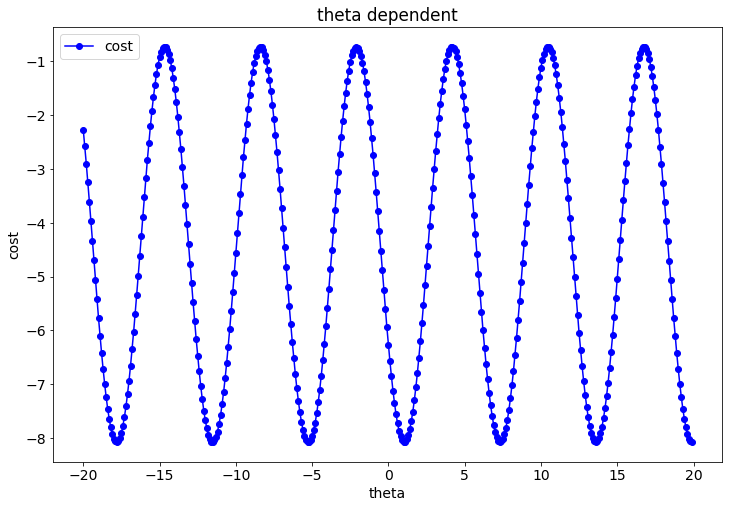

In [13]:
plot_list = [-2.2733521551011635, -2.5825338173503543, -2.9098831513046366, -3.252129390626445, -3.605852924024034, -3.967519462877155, -4.333515354680646, -4.700183689465773, -5.063860838435788, -5.4209130597338735, -5.76777280559059, -6.100974368081917, -6.417188507337238, -6.713255716203618, -6.986217788996868, -7.233347378914895, -7.45217524878543, -7.640514942867603, -7.796484633194961, -7.918525922178486, -8.005419413600135, -8.056296896416804, -8.07065001963803, -8.048335371601116, -7.989575912893003, -7.8949587486017885, -7.765429262156822, -7.602281669369883, -7.407146087058684, -7.18197224545844, -6.929010007161828, -6.6507868872357205, -6.350082799126076, -6.029902278681734, -5.693444463825368, -5.344071129824852, -4.985273099546048, -4.620635364304649, -4.253801263817971, -3.888436083158846, -3.528190430438751, -3.1766637611382826, -2.8373684135378276, -2.5136945145944716, -2.2088761069140967, -1.9259588352666757, -1.667769515510491, -1.4368878899825055, -1.2356208515656772, -1.065979393977827, -0.9296585185871657, -0.828020298518904, -0.7620802692708368, -0.7324972818183357, -0.7395669195931873, -0.7832185451116616, -0.8630160057608817, -0.978161991691578, -1.1275060022745318, -1.3095558415225665, -1.5224925276195873, -1.7641884675856274, -2.032228715482602, -2.323935101755847, -2.6363929926190277, -2.966480412111498, -3.3108992358500746, -3.666208144797687, -4.028857009785645, -4.395222363230762, -4.7616436036257, -5.124459571059199, -5.4800451283156635, -5.824847382047951, -6.155421182113239, -6.4684635443744485, -6.7608466530259035, -7.029649112694981, -7.272185138058928, -7.4860313893240695, -7.66905118543594, -7.819415853090087, -7.935622998231254, -8.016511517478179, -8.061273199484717, -8.069460800320524, -8.0409925121845, -7.976152780801337, -7.875589463333848, -7.7403073552083566, -7.571658150530928, -7.371326936406691, -7.141315356106481, -6.883921609308931, -6.601717489248985, -6.2975226862100016, -5.974376614110517, -5.6355080416850605, -5.284302831694242, -4.924270110503285, -4.559007206051339, -4.192163704539823, -3.827404984973499, -3.468375595905071, -3.118662840310779, -2.781760932444848, -2.4610360848057122, -2.1596928740534436, -1.8807422219390562, -1.62697131116965, -1.4009157368001233, -1.2048341714055384, -1.0406857971713712, -0.910110730392728, -0.8144136339744866, -0.7545506816708004, -0.7311200043130281, -0.7443557134841762, -0.7941255623533506, -0.8799322670423746, -1.0009184753219227, -1.1558753329915872, -1.3432545623514602, -1.561183932081115, -1.8074859639560832, -2.0796996894905058, -2.375105239120726, -2.6907510182429384, -3.0234831985707737, -3.369977230145032, -3.7267710591379197, -4.090299719550504, -4.456930953174534, -4.823001501915822, -5.184853709858162, -5.538872069352257, -5.88151934597293, -6.209371921396328, -6.51915400106247, -6.807770344831675, -7.072337193600882, -7.310211082871353, -7.519015255372166, -7.696663408833163, -7.841380541627634, -7.9517206880018305, -8.026581365686773, -8.065214591536698, -8.067234355129338, -8.032620475654547, -7.961718803554189, -7.855237764898923, -7.714241283029036, -7.540138148184135, -7.334667941336747, -7.099883652874269, -6.838131169797643, -6.552025836393922, -6.24442632258061, -5.918406061020852, -5.5772225384001946, -5.224284747696371, -4.863119126648376, -4.497334322756243, -4.130585136868076, -3.766536005618109, -3.408824387587152, -3.0610244190188256, -2.726611202231685, -2.408926083545552, -2.1111432676536004, -1.8362381020183092, -1.5869573481831434, -1.3657917370391612, -1.1749510822652818, -1.0163422006004703, -0.8915498595611994, -0.8018209429682686, -0.748051992495838, -0.7307802497233766, -0.7501782881953882, -0.8060522891235977, -0.8978439779602219, -1.0246362024927003, -1.1851620967254446, -1.3778177389860875, -1.6006781777806451, -1.8515166652725508, -2.127826906210965, -2.426848100004455, -2.745592525727897, -3.08087539444237, -3.4293466705534494, -3.7875245442595267, -4.1518302206444, -4.518623677813067, -4.884240036787303, -5.245026179764938, -5.5973772508653745, -5.937772674657967, -6.2628113325879315, -6.56924554582873, -6.854013525015361, -7.114269962631557, -7.347414462382, -7.551117521492509, -7.723343806331731, -7.862372488791989, -7.966814440234916, -8.03562611120561, -8.06811995823385, -8.063971313541174, -8.023221629013978, -7.946278062030007, -7.833909407276407, -7.687238415207331, -7.5077305738925615, -7.297179466345098, -7.057688849632623, -6.791651634832247, -6.5017259778540515, -6.190808720025878, -5.862006443812362, -5.518604432869852, -5.1640338465780715, -4.801837437029792, -4.43563415102301, -4.069082970740786, -3.7058463544107987, -3.3495536422333516, -3.003764793213805, -2.671934815228971, -2.3573792437304664, -2.0632410140104547, -1.7924590580311268, -1.5477389395880163, -1.331525821210887, -1.1459800329080139, -0.9929554868628305, -0.8739811537562349, -0.7902457857969396, -0.7425860391023632, -0.7314781141072585, -0.7570329975263856, -0.8189953534119419, -0.9167460743859526, -1.0493084675565343, -1.2153580133104298, -1.4132355994751473, -1.6409640986193643, -1.8962681228566611, -2.1765967587691546, -2.479149055291131, -2.8009020098862307, -3.1386407733895347, -3.4889907717177064, -3.8484514234977594, -4.213431116719, -4.580283094933021, -4.945341894438634, -5.304959968383574, -5.655544131846928, -5.993591463755072, -6.315724306911183, -6.618724016429394, -6.899563119370593, -7.155435564251255, -7.383784758182326, -7.582329111500236, -7.749084834656687, -7.882385759588008, -7.980899987515706, -8.043643196838806, -8.069988478149908, -8.059672598106731, -8.012798629572695, -7.9298349217469175, -7.811610420573835, -7.659306386189352, -7.474444590160015, -7.258872110444564, -7.014742876001522, -6.744496145443053, -6.450832134769207, -6.136685037702218, -5.805193708192762, -5.4596702980288265, -5.103567162909915, -4.740442367650087, -4.373924135170485, -4.00767459449523, -3.645353189968739, -3.2905801172975093, -2.9469001517512896, -2.6177472299403224, -2.3064101390558527, -2.0159996563956413, -1.7494174675054848, -1.5093271734964184, -1.2981276772228805, -1.1179292142383648, -0.9705322680193209, -0.8574095801294169, -0.7796914350726594, -0.7381543668642524, -0.7332134001594057, -0.7649179034641653, -0.8329510958616277, -0.9366332121821427, -1.0749282949921832, -1.2464545455385885, -1.4494981302249406, -1.6820303046703382, -1.941727684252638, -2.225995458599598, -2.5319933180763723, -2.856663833220516, -3.196763003566513, -3.5488926706261013, -3.9095344711646187, -4.275084991523407, -4.641891771737982, -5.006289799710643, -5.364638130799857, -5.713356266935588, -6.048959931772466, -6.368095884427253, -6.667575423953344, -6.944406249786575, -7.195822359823319, -7.419311687399212, -7.612641201028856, -7.773879216118315, -7.901414695719007, -7.993973347476391, -8.050630355937923, -8.07081962300339, -8.05433942418994, -8.0013544241965, -7.912394031628478, -7.7883471093220304, -7.6304530931203765, -7.440289607840581, -7.21975670416788, -6.971057873977264, -6.696678033771108, -6.3993586962148346, -6.0820705778486, -5.747983916669609, -5.4004367961619995, -5.04290179227007, -4.678951276567356, -4.3122217223007135, -3.9463773699517057, -3.5850736153569334, -3.231920486201166, -2.8904465718140235, -2.5640637666718016, -2.2560331798756605, -1.9694325512274926, -1.7071254994711846, -1.4717329099606997, -1.2656067476399793, -1.0908065569866845, -0.9490788837245622, -0.8418398239159056, -0.7701608747978055, -0.7347582287359369, -0.7359856172671922, -0.7738307767310881, -0.8479155708042073, -0.9574997687133469, -1.1014884413767236, -1.2784429015734062, -1.4865950788304791, -1.7238651853987519, -1.9878824968044628, -2.2760090393445664, -2.585365947847977, -2.9128622303447216, -3.2552256522359753, -3.609035431380495, -3.9707564174190413, -4.336774413828171, -4.703432289777231, -5.067066520970717, -5.424043794372034, -5.770797311066367, -6.103862424536361, -6.41991125826493, -6.715785956777302, -6.988530237889115, -7.23541893090078, -7.4539852056022635, -7.642045220025167, -7.79771994066974, -7.919453917186528, -8.006030823922083, -8.05658561304281, -8.07061315780702]
plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 14
plt.title('theta dependent')
plt.xlabel("theta")
plt.ylabel("cost")
plt.plot(np.arange(-20.0, 20.0, 0.1, dtype=float), plot_list, marker='o', color='blue', label='cost')
plt.legend()

KeyError: 'depth'

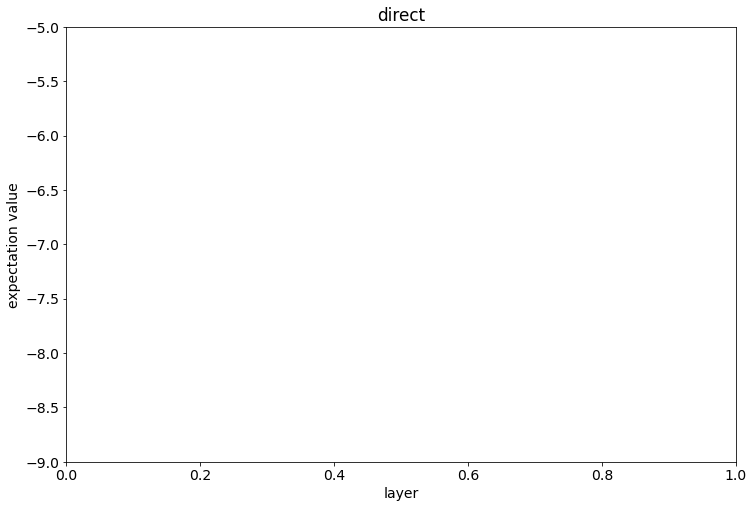

In [14]:
## 直接制御
method = 'direct'
depth_list = [1,2,4,8]
direct_results = run(method, nqubit, depth_list)

d_plot_list = {}

for result in direct_results:
    if 'depth' not in d_plot_list.keys():
        d_plot_list["depth"] = [result['depth']]
        d_plot_list["cost-min"] = [result['cost']['min']]
        d_plot_list["cost-mean"] = [result['cost']['mean']]
        d_plot_list["iter-min"] = [result['iter']['min']]
        d_plot_list["iter-max"] = [result['iter']['max']]
        d_plot_list["iter-mean"] = [result['iter']['mean']]
    else:
        d_plot_list["depth"].append(result['depth'])
        d_plot_list["cost-min"].append(result['cost']['min'])
        d_plot_list["cost-mean"].append(result['cost']['mean'])
        d_plot_list["iter-min"].append(result['iter']['min'])
        d_plot_list["iter-max"].append(result['iter']['max'])
        d_plot_list["iter-mean"].append(result['iter']['mean'])

create_expectation_graph("direct")
plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(d_plot_list['depth'], d_plot_list['cost-min'], marker='o', color='blue', label='direct cost (min)')
plt.plot(d_plot_list['depth'], d_plot_list['cost-mean'], marker='o', color='red', label='direct cost (avg)')
plt.legend()
plt.savefig('image/direct_energy.png')

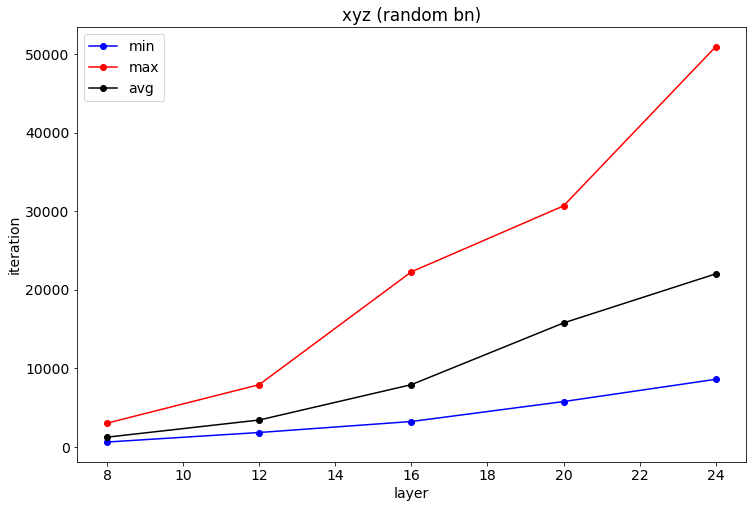

In [62]:
create_iteration_graph("xyz (random bn)")
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-iter-min'], marker='o', color='blue', label='min')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-iter-max'], marker='o', color='red', label='max')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-iter-mean'], marker='o', color='black', label='avg')
plt.legend()
plt.savefig('image/xyz_random_bn_iteration.png')

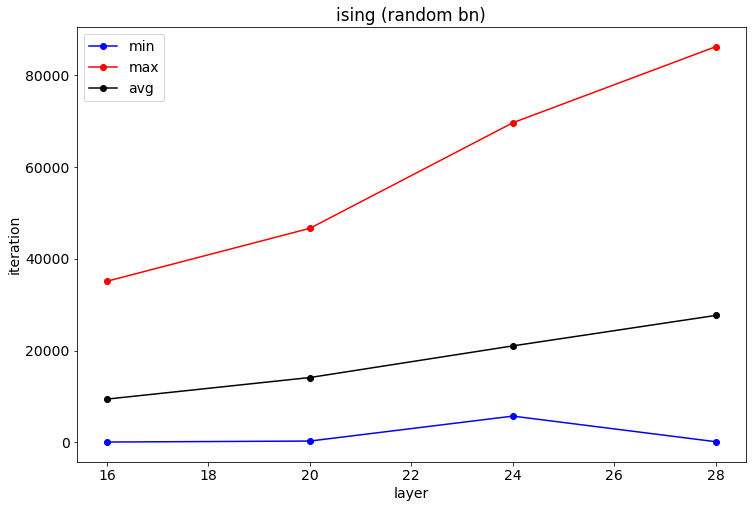

In [63]:
create_iteration_graph("ising (random bn)")
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-iter-min'], marker='o', color='blue', label='min')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-iter-max'], marker='o', color='red', label='max')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-iter-mean'], marker='o', color='black', label='avg')
plt.legend()
plt.savefig('image/ising_random_bn_iteration.png')

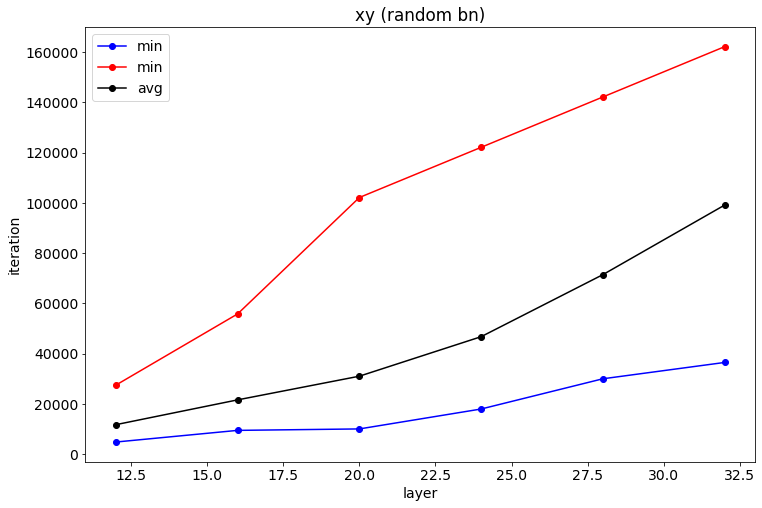

In [64]:
create_iteration_graph("xy (random bn)")
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-iter-min'], marker='o', color='blue', label='min')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-iter-max'], marker='o', color='red', label='min')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-iter-mean'], marker='o', color='black', label='avg')
plt.legend()
plt.savefig('image/xy_random_bn_iteration.png')

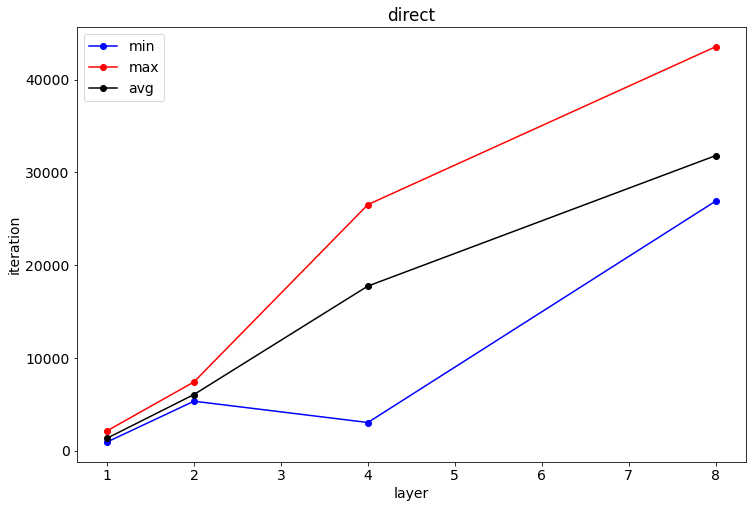

In [65]:
create_iteration_graph("direct")
plt.plot(d_plot_list['depth'], d_plot_list['iter-min'], marker='o', color='blue', label='min')
plt.plot(d_plot_list['depth'], d_plot_list['iter-max'], marker='o', color='red', label='max')
plt.plot(d_plot_list['depth'], d_plot_list['iter-mean'], marker='o', color='black', label='avg')
plt.legend()
plt.savefig('image/direct_iteration.png')

In [154]:
random_results = []
nqubit = 7

method = 'indirect_xy'
random_results.extend(run(method, nqubit, [12], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [12], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [12], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [12], 'static_random', 1, None))
random_results.extend(run(method, nqubit, [12], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [12], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [12], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [12], 'static_random', 8, None))
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [12], 'static_random', 1, None))
random_results.extend(run(method, nqubit, [16], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [16], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [16], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [16], 'static_random', 8, None))
random_results.extend(run(method, nqubit, [20], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [20], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [20], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [12], 'static_random', 1, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 8, None))
random_results.extend(run(method, nqubit, [24], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [24], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [24], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [12], 'static_random', 1, None))
random_results.extend(run(method, nqubit, [24], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [24], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [24], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [24], 'static_random', 8, None))

bn_plot_list = {}
for result in random_results:
    if result['bn_type'] == 'static_random':
        if ("%s-%s-depth" % (result['method'], result['bn_range'])) not in bn_plot_list.keys():
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_range'])] = [result['depth']]
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_range'])] = [result['cost']['min']]
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_range'])] = [result['cost']['mean']]
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_range'])] = [result['iter']['min']]
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_range'])] = [result['iter']['max']]
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_range'])] = [result['iter']['mean']]
        else:
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_range'])].append(result['depth'])
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_range'])].append(result['cost']['min'])
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_range'])].append(result['cost']['mean'])
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_range'])].append(result['iter']['min'])
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_range'])].append(result['iter']['max'])
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_range'])].append(result['iter']['mean'])
    elif result['bn_type'] == 'static':
        if ("%s-%s-depth" % (result['method'], result['bn_value'])) not in bn_plot_list.keys():
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_value'])] = [result['depth']]
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_value'])] = [result['cost']['min']]
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_value'])] = [result['cost']['mean']]
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_value'])] = [result['iter']['min']]
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_value'])] = [result['iter']['max']]
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_value'])] = [result['iter']['mean']]
        else:
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_value'])].append(result['depth'])
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_value'])].append(result['cost']['min'])
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_value'])].append(result['cost']['mean'])
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_value'])].append(result['iter']['min'])
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_value'])].append(result['iter']['max'])
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_value'])].append(result['iter']['mean'])

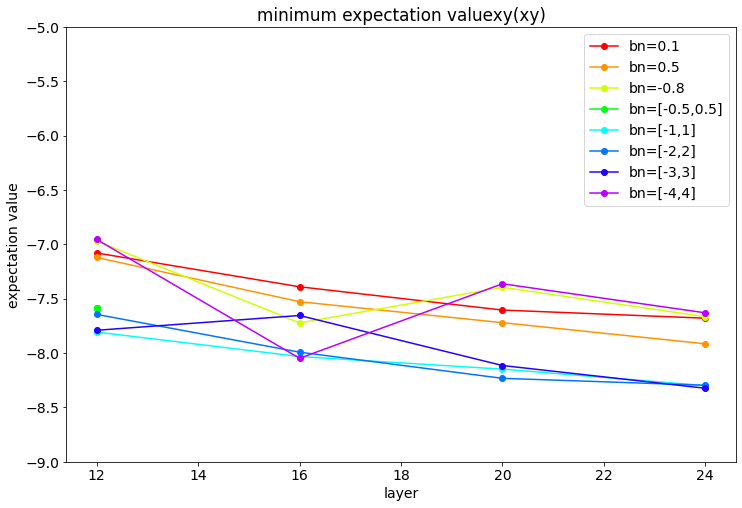

In [156]:
create_expectation_graph("minimum expectation valuexy(xy)")
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_01.value)], bn_plot_list['indirect_xy-%s-cost-min' % (MagneticField.BN_01.value)], marker='o', color=cm.hsv(0/10.0), label='bn=0.1')
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_05.value)], bn_plot_list['indirect_xy-%s-cost-min' % (MagneticField.BN_05.value)], marker='o', color=cm.hsv(1/10.0), label='bn=0.5')
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_MINUS_08.value)], bn_plot_list['indirect_xy-%s-cost-min' % (MagneticField.BN_MINUS_08.value)], marker='o', color=cm.hsv(2/10.0), label='bn=-0.8')
plt.plot(bn_plot_list['indirect_xy-1-depth'], bn_plot_list['indirect_xy-1-cost-min'], marker='o', color=cm.hsv(3.5/10.0), label='bn=[-0.5,0.5]')
plt.plot(bn_plot_list['indirect_xy-2-depth'], bn_plot_list['indirect_xy-2-cost-min'], marker='o', color=cm.hsv(5/10.0), label='bn=[-1,1]')
plt.plot(bn_plot_list['indirect_xy-4-depth'], bn_plot_list['indirect_xy-4-cost-min'], marker='o', color=cm.hsv(6/10.0), label='bn=[-2,2]')
plt.plot(bn_plot_list['indirect_xy-6-depth'], bn_plot_list['indirect_xy-6-cost-min'], marker='o', color=cm.hsv(7/10.0), label='bn=[-3,3]')
plt.plot(bn_plot_list['indirect_xy-8-depth'], bn_plot_list['indirect_xy-8-cost-min'], marker='o', color=cm.hsv(8/10.0), label='bn=[-4,4]')
plt.legend()
plt.savefig('image/xy_compare_bn_energy_min.png')

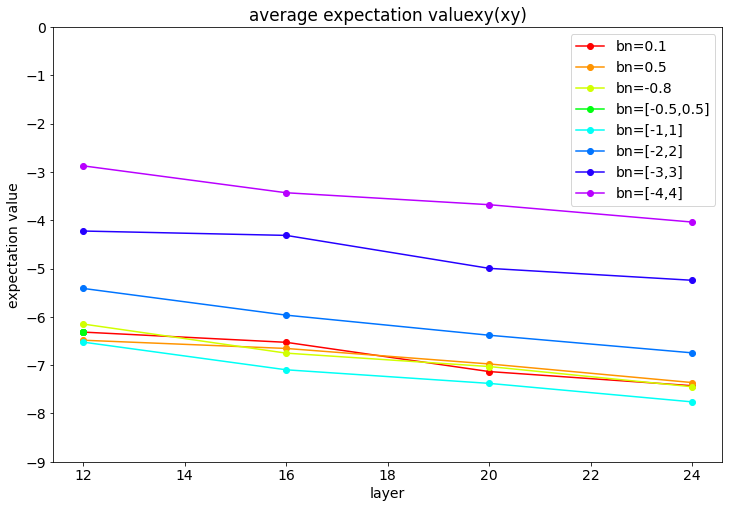

In [157]:
create_expectation_graph("average expectation valuexy(xy)", -9.0, 0)
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_01.value)], bn_plot_list['indirect_xy-%s-cost-mean' % (MagneticField.BN_01.value)], marker='o', color=cm.hsv(0/10.0), label='bn=0.1')
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_05.value)], bn_plot_list['indirect_xy-%s-cost-mean' % (MagneticField.BN_05.value)], marker='o', color=cm.hsv(1/10.0), label='bn=0.5')
plt.plot(bn_plot_list['indirect_xy-%s-depth' % (MagneticField.BN_MINUS_08.value)], bn_plot_list['indirect_xy-%s-cost-mean' % (MagneticField.BN_MINUS_08.value)], marker='o', color=cm.hsv(2/10.0), label='bn=-0.8')
plt.plot(bn_plot_list['indirect_xy-1-depth'], bn_plot_list['indirect_xy-1-cost-mean'], marker='o', color=cm.hsv(3.5/10.0), label='bn=[-0.5,0.5]')
plt.plot(bn_plot_list['indirect_xy-2-depth'], bn_plot_list['indirect_xy-2-cost-mean'], marker='o', color=cm.hsv(5/10.0), label='bn=[-1,1]')
plt.plot(bn_plot_list['indirect_xy-4-depth'], bn_plot_list['indirect_xy-4-cost-mean'], marker='o', color=cm.hsv(6/10.0), label='bn=[-2,2]')
plt.plot(bn_plot_list['indirect_xy-6-depth'], bn_plot_list['indirect_xy-6-cost-mean'], marker='o', color=cm.hsv(7/10.0), label='bn=[-3,3]')
plt.plot(bn_plot_list['indirect_xy-8-depth'], bn_plot_list['indirect_xy-8-cost-mean'], marker='o', color=cm.hsv(8/10.0), label='bn=[-4,4]')
plt.legend()
plt.savefig('image/xy_compare_bn_energy_mean.png')

In [85]:
get_csv(vqe_results + direct_results + random_results)

indirect_ising,16,static_random,2,None,-7.287830337438277,6.0000000000001625,-5.757172360781831,1.4199556359781769,101.0,35092.0,9445.48,6210.143625521072
indirect_ising,20,static_random,2,None,-8.03340542665132,-1.502847681354614,-6.238902538036034,1.0760817234311928,314.0,46605.0,14136.13,9131.211051832062
indirect_ising,24,static_random,2,None,-8.318740232513381,-4.5377137218299435,-6.697317384924971,0.8836173644535855,5741.0,69575.0,21020.62,12658.475404076116
indirect_ising,28,static_random,2,None,-8.236665021323399,6.000000000000198,-6.682563315322366,1.6528735149699865,173.0,86125.0,27649.24,18748.941789402408
indirect_ising,16,static,None,-1.0,-6.63089462004592,-5.793305658500772,-6.127748821460973,0.2623556184076094,2342.0,8248.0,4639.2,1449.941157426742
indirect_ising,20,static,None,-1.0,-7.8496279134924665,-4.869054809534436,-6.935773718216952,0.9527427838951092,5515.0,12156.0,7741.7,1909.1862166902422
indirect_ising,24,static,None,-1.0,-8.005978587519097,-7.363389463996913,

In [152]:
random_results = []
nqubit = 7

method = 'indirect_xy'
depth_list = [12,16,20,24]
for bn in [MagneticField.BN_0, MagneticField.BN_01, MagneticField.BN_02, MagneticField.BN_03, MagneticField.BN_04, MagneticField.BN_05, MagneticField.BN_06, MagneticField.BN_07, MagneticField.BN_08, MagneticField.BN_09, MagneticField.BN_MINUS_01, MagneticField.BN_MINUS_02, MagneticField.BN_MINUS_03, MagneticField.BN_MINUS_04, MagneticField.BN_MINUS_05, MagneticField.BN_MINUS_06, MagneticField.BN_MINUS_07, MagneticField.BN_MINUS_08, MagneticField.BN_MINUS_09, MagneticField.BN_MINUS_10]:
    random_results.extend(run(method, nqubit, depth_list, 'static', None, create_bn(bn, 7)))

bn_plot_list = {}
for result in random_results:
    if result['bn_type'] == 'static_random':
        if ("%s-%s-depth" % (result['method'], result['bn_range'])) not in bn_plot_list.keys():
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_range'])] = [result['depth']]
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_range'])] = [result['cost']['min']]
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_range'])] = [result['cost']['mean']]
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_range'])] = [result['iter']['min']]
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_range'])] = [result['iter']['max']]
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_range'])] = [result['iter']['mean']]
        else:
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_range'])].append(result['depth'])
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_range'])].append(result['cost']['min'])
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_range'])].append(result['cost']['mean'])
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_range'])].append(result['iter']['min'])
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_range'])].append(result['iter']['max'])
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_range'])].append(result['iter']['mean'])
    elif result['bn_type'] == 'static':
        if ("%s-%s-depth" % (result['method'], result['bn_value'])) not in bn_plot_list.keys():
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_value'])] = [result['depth']]
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_value'])] = [result['cost']['min']]
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_value'])] = [result['cost']['mean']]
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_value'])] = [result['iter']['min']]
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_value'])] = [result['iter']['max']]
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_value'])] = [result['iter']['mean']]
        else:
            bn_plot_list["%s-%s-depth" % (result['method'], result['bn_value'])].append(result['depth'])
            bn_plot_list["%s-%s-cost-min" % (result['method'], result['bn_value'])].append(result['cost']['min'])
            bn_plot_list["%s-%s-cost-mean" % (result['method'], result['bn_value'])].append(result['cost']['mean'])
            bn_plot_list["%s-%s-iter-min" % (result['method'], result['bn_value'])].append(result['iter']['min'])
            bn_plot_list["%s-%s-iter-max" % (result['method'], result['bn_value'])].append(result['iter']['max'])
            bn_plot_list["%s-%s-iter-mean" % (result['method'], result['bn_value'])].append(result['iter']['mean'])

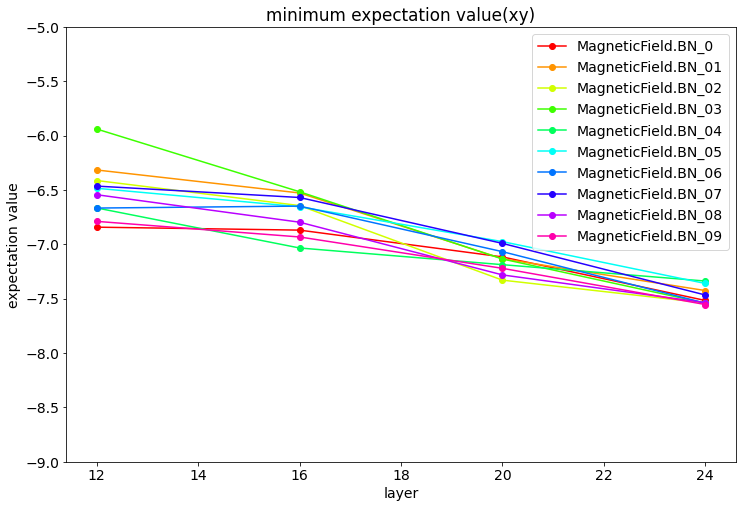

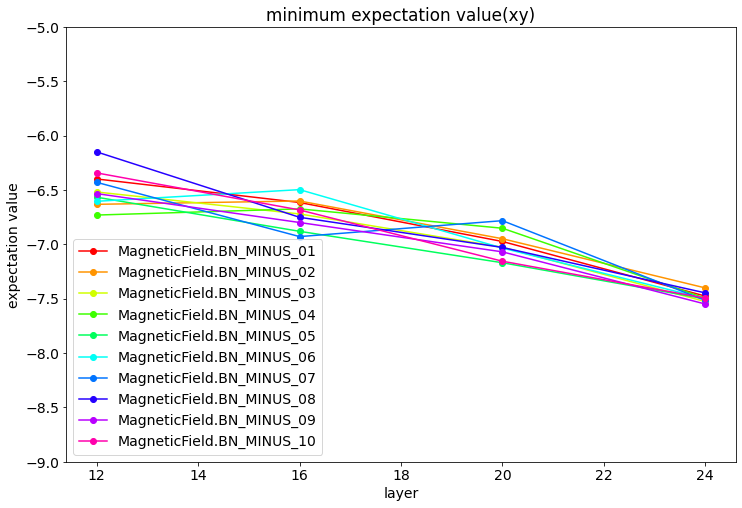

In [153]:
create_expectation_graph("minimum expectation value(xy)")
for i, bn in enumerate([
    MagneticField.BN_0,
    MagneticField.BN_01,
    MagneticField.BN_02,
    MagneticField.BN_03,
    MagneticField.BN_04,
    MagneticField.BN_05,
    MagneticField.BN_06,
    MagneticField.BN_07,
    MagneticField.BN_08,
    MagneticField.BN_09
]):
    plt.plot(bn_plot_list['indirect_xy-%s-depth' % (bn.value)], bn_plot_list['indirect_xy-%s-cost-mean' % (bn.value)], marker='o', color=cm.hsv(i/10.0), label=bn)

plt.legend()
plt.savefig('image/xy_compare_all_plus_bn_energy_mean.png')

create_expectation_graph("minimum expectation value(xy)")
for i, bn in enumerate([
    MagneticField.BN_MINUS_01,
    MagneticField.BN_MINUS_02,
    MagneticField.BN_MINUS_03,
    MagneticField.BN_MINUS_04,
    MagneticField.BN_MINUS_05,
    MagneticField.BN_MINUS_06,
    MagneticField.BN_MINUS_07,
    MagneticField.BN_MINUS_08,
    MagneticField.BN_MINUS_09,
    MagneticField.BN_MINUS_10
]):
    plt.plot(bn_plot_list['indirect_xy-%s-depth' % (bn.value)], bn_plot_list['indirect_xy-%s-cost-mean' % (bn.value)], marker='o', color=cm.hsv(i/10.0), label=bn)

plt.legend()
plt.savefig('image/xy_compare_all_minus_bn_energy_mean.png')
